# Project 2B: Ames Housing Data & Kaggle Challenge

## 3. Exploratory Data Analysis

### Overall Contents:
- Background
- Data Cleaning
- [Exploratory Data Analysis](#3.-Exploratory-Data-Analysis) **(In this notebook)**
- Modeling
- Conclusions and Recommendations

### Data Dictionary
The dataset used for this analysis are as followed:-

* [`train`]: Ames Housing Train Data - labeled as housing_data

Data source: [Ames Housing Data](https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge/data) obtained from database [Ames Iowa Assessor's Office](http://www.cityofames.org/assessor/)

## 3.1. Data Import

### 3.1.1 Libraries Import

In [2]:
# Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

%config InlineBackend.figure_format = 'retina'
%matplotlib inline 

### 3.1.2 Data Import

In [3]:
# Import of Ames Housing Train Data from csv
housing_data = pd.read_csv('../datasets/housing_data_clean_id.csv')
test_housing_data = pd.read_csv('../datasets/test_housing_data_clean_id.csv')

## 3.2 Data Category

**The data consists of 8 main categories which are as followed:-**
1. Sales
2. Physical House Characteristics
3. House Material and Foundation
4. Rooms
5. Basement
6. Garage
7. Electrical and Heating
8. External Facilities

We will further explore each category in-depth with consideration of several of potential buyer interest as listed in the property search engine [[1]](https://www.movoto.com/ames-ia/new-7/)[[2]](https://desmoines.homefront.com/homesearch/ames-ia)[[3]](https://www.zillow.com/homes/)

The features of interest are as followed:-
1. Main Interest - Bedroom, Bath, Above Ground Living Area, Year Built, Lot Area, Location
2. Other Considerations - Ms zoning, Basement, Central Air, Heating, Fireplace, Garage Cars, Exterior Roofing, Exterior House (general), Fencing, Utilities, Pool, House Level/Style, Total rooms above ground.

### 3.2.1 Sales

The sales include miscellaneous features and miscellaneous value, month sold, year sold, sale type and sale price.

In [4]:
# Summary Statistics of Sales
housing_data[["saleprice", "misc_val"]].describe()

,saleprice,misc_val
count,2051.000000,2051.000000
mean,181469.701609,51.574354
std,79258.659352,573.393985
min,12789.000000,0.000000
25%,129825.000000,0.000000
50%,162500.000000,0.000000
75%,214000.000000,0.000000
max,611657.000000,17000.000000


**Analysis: There is a non-symmetrical distribution in misc_val and saleprice**

There is a non-symmetrical distribution in miscellaneous value whereby it is highly negatively-skewed with a huge proportion, about 75% does not have any value. On the other hand, with a high maximum value of saleprice that is more than three standard deviation from the mean, might indicate a non-symmetrical distribution in saleprice.

**3.2.1.1 Distribution of Saleprice**

**To observe the distribution of the saleprice, we will plot a histogram and a boxplot**

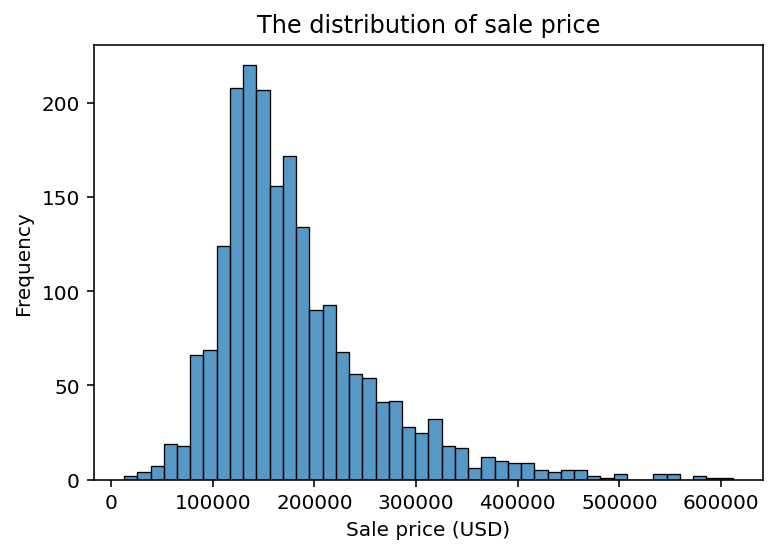

In [5]:
# Saleprice distribution
sns.histplot(housing_data["saleprice"])
plt.xlabel('Sale price (USD)')
plt.ylabel('Frequency')
plt.title('The distribution of sale price');

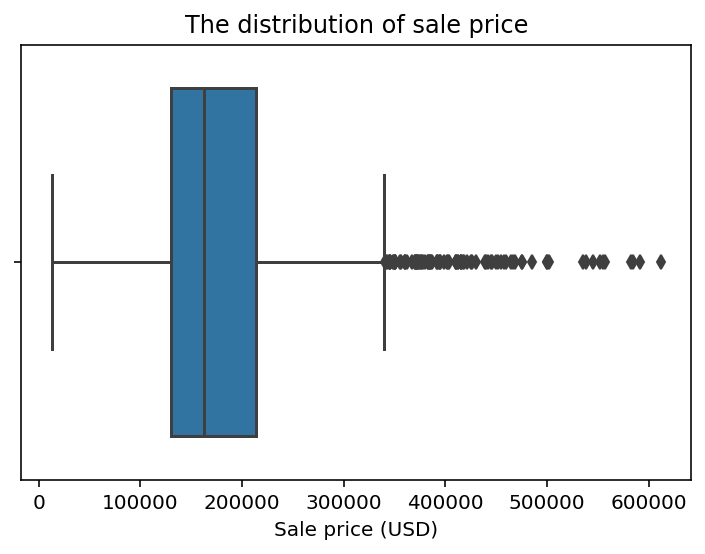

In [6]:
# Saleprice boxplot
sns.boxplot(data = housing_data, x = "saleprice")
plt.xlabel('Sale price (USD)')
plt.title('The distribution of sale price');

**Analysis: The distribution of sale price is non-symmetrical and positively skewed**

The distribution of sale price is non-symmetrical with the mean about USD181469.70 with standard deviation of USD79258.66. 
There are presence of outliers as observed by the boxplot and the maximum value of USD611657.00, which is three times standard deviation above the mean given that the sale price is normally distributed. 
As the distribution is non-symmetrical, we will use the outer fence of the range to remove the extreme outliers.

In [7]:
# To identify the range of outer fence of the range

percentile_25 = np.percentile(housing_data["saleprice"], 25)
percentile_75 = np.percentile(housing_data["saleprice"], 75)
interquartile_range = percentile_75 - percentile_25
data_range_low_outer = percentile_25 - (3*interquartile_range)
data_range_high_outer = percentile_75 + (3*interquartile_range)

print(f"The 25th percentile is {percentile_25}")
print(f"The 75th percentile is {percentile_75}")
print(f"The interquartile range is {interquartile_range}")
print(f"The outer_low_range is {0 if data_range_low_outer < 0 else data_range_low_outer}")
print(f"The outer_high_range is {data_range_high_outer}")

The 25th percentile is 129825.0
The 75th percentile is 214000.0
The interquartile range is 84175.0
The outer_low_range is 0
The outer_high_range is 466525.0


In [8]:
# The list saleprice that are extreme outliers
housing_data.loc[(housing_data["saleprice"]>466525), : ].head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,sale_type,saleprice,alley_Grvl,alley_Pave,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd
81,367,20,RL,63,17423,Pave,2,Lvl,3,CulDSac,...,New,501837,0,0,0,1,0,0,0,0
138,2331,60,RL,60,18062,Pave,2,HLS,3,CulDSac,...,New,545224,0,0,0,0,0,1,0,0
151,2333,60,RL,85,16056,Pave,2,Lvl,3,Inside,...,New,556581,0,0,0,0,0,1,0,0
623,457,20,RL,100,14836,Pave,2,HLS,3,Inside,...,WD,552000,0,0,0,1,0,0,0,0
685,514,20,RL,85,11128,Pave,3,Lvl,3,Corner,...,WD,468000,0,0,0,1,0,0,0,0


In [9]:
# Rempve the extreme outliers
housing_data = housing_data[housing_data["saleprice"]<466525]
housing_data = housing_data.reset_index(drop=True)

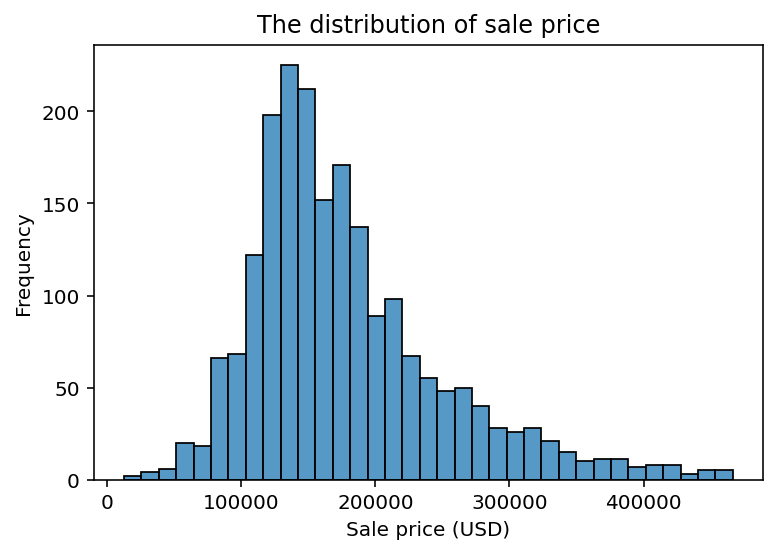

In [10]:
# Saleprice distribution after removing outliers
sns.histplot(housing_data["saleprice"])
plt.xlabel('Sale price (USD)')
plt.ylabel('Frequency')
plt.title('The distribution of sale price');

**Analysis: The distribution is slightly positively skewed**

Despite removing the outlier, the distribution of sale price is slightly positively skwere. Thus, we will be performing a log of sale price to observe the distribution.

In [11]:
housing_data['log_saleprice'] = np.log(housing_data["saleprice"])

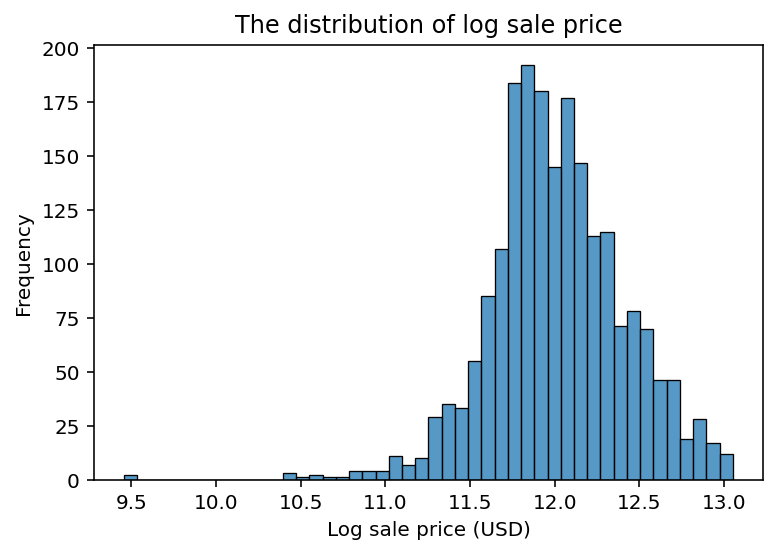

In [12]:
# Log saleprice distribution
sns.histplot(housing_data["log_saleprice"])
plt.xlabel('Log sale price (USD)')
plt.ylabel('Frequency')
plt.title('The distribution of log sale price');

**Analysis: The distribution of log saleprice is more symmetrical and will be used for further analysis**


**3.2.1.2 Distribution of Miscellaneous Value**

**To observe the distribution of the misc_value, we will plot a histogram**

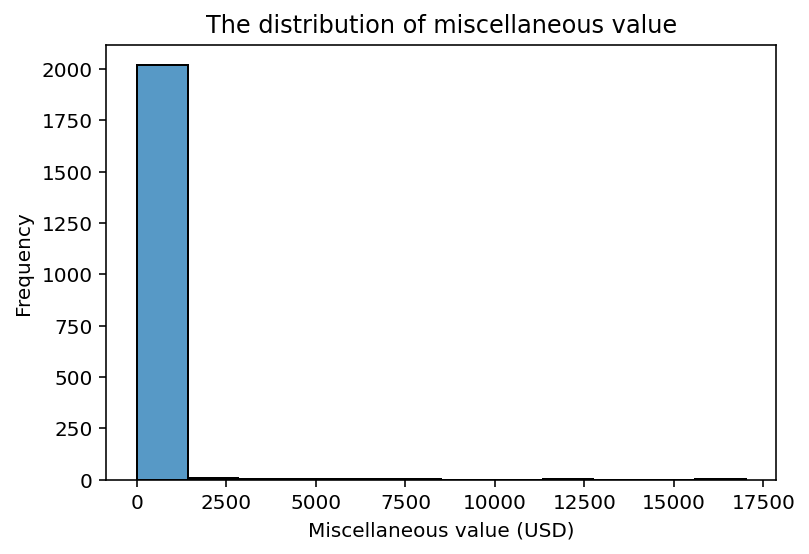

In [13]:
# Saleprice distribution
sns.histplot(housing_data["misc_val"])
plt.xlabel('Miscellaneous value (USD)')
plt.ylabel('Frequency')
plt.title('The distribution of miscellaneous value');

In [14]:
housing_data.groupby("misc_feature")["misc_val"].agg(["count", "mean"])

,count,mean
misc_feature,,
Elev,1,17000.000000
Gar2,4,7075.000000
None,1969,0.000000
Othr,3,4333.333333
Shed,56,812.125000
TenC,1,2000.000000


**Analysis: There is a significant proportion of houses (about 97%) that do not have additional miscellaneous features, thus this indicates that miscellaneous features and its value will not significantly affect the sale price.**

**3.2.1.3 Distribution of month sale and year sale**

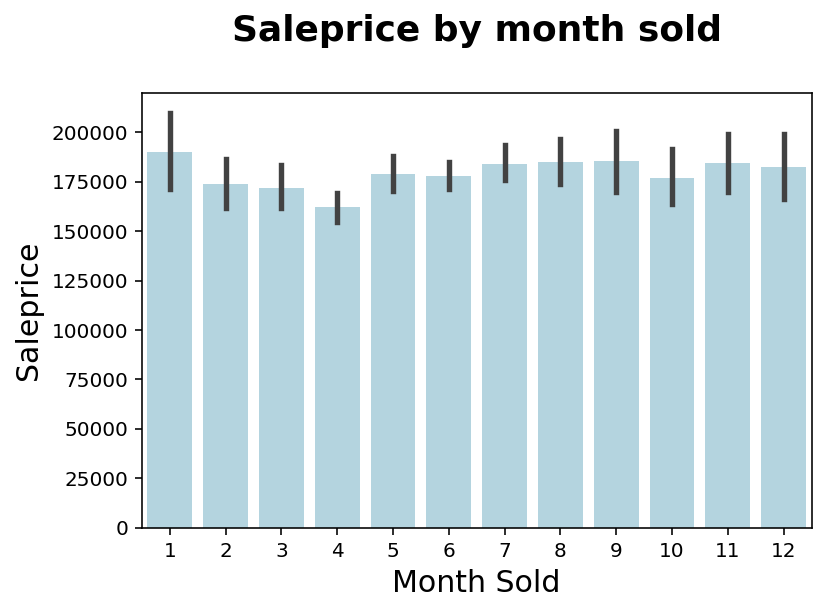

In [15]:
# Saleprice distribution
sns.barplot(x = "mo_sold", y = "saleprice", data = housing_data, color = ('LightBlue'))
plt.xlabel("Month Sold", fontdict = {'fontsize' : 15})
plt.ylabel("Saleprice", fontdict = {'fontsize' : 15})
plt.title(('Saleprice by month sold\n'), weight = 'bold', fontdict = {'fontsize': 18});

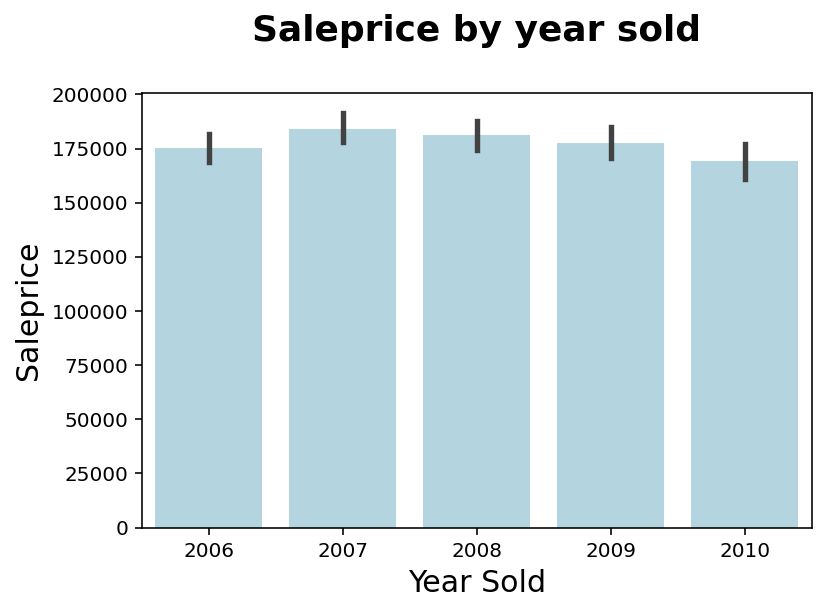

In [16]:
# Saleprice distribution
sns.barplot(x = "yr_sold", y = "saleprice", data = housing_data, color = ('LightBlue'))
plt.xlabel("Year Sold", fontdict = {'fontsize' : 15})
plt.ylabel("Saleprice", fontdict = {'fontsize' : 15})
plt.title(('Saleprice by year sold\n'), weight = 'bold', fontdict = {'fontsize': 18});

**Analysis: The saleprice is approximately similar throughout the month and year with a slightly lower sale in April. This suggests that the month and year sold will not significantly affect the sale price.**

**Summary: The miscellaneous feature, value, month sold and year sold will not be used for further studies in modeling.**

### 3.2.2 Physical House Characteristics

The main physical house characteristics include MS Subclass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Lot Config, Land Slope, Neighbourhood, Condition 1 and Condition 2, Building Type, House Style, Overall Quality, Overall Condition, Year Built, Year Remod and Functional.

Buyer Interest : Lot Area, Year Built, Location, Ms zoning, House Level/Style

As the buyer interest is lot area, year built, location, ms zoning and house level/style, we will be focusing mainly on these parameters. As the location (neighbourhood) and house level/style has many categorical variable in it, we will be using other features such as overall quality and overall condition to represent these features. For ms zoning, we will dummify at the later stage prior to fitting into the model.

### 3.2.2.1 Distribution of lot area

In [17]:
housing_data["lot_area"].describe()

count      2034.000000
mean       9983.042773
std        6615.440040
min        1300.000000
25%        7500.000000
50%        9373.000000
75%       11444.000000
max      159000.000000
Name: lot_area, dtype: float64

**Analysis: The distribution of lot area is non-symmetrical with a very high maximum value which might suggest that there is a presence of outliers**

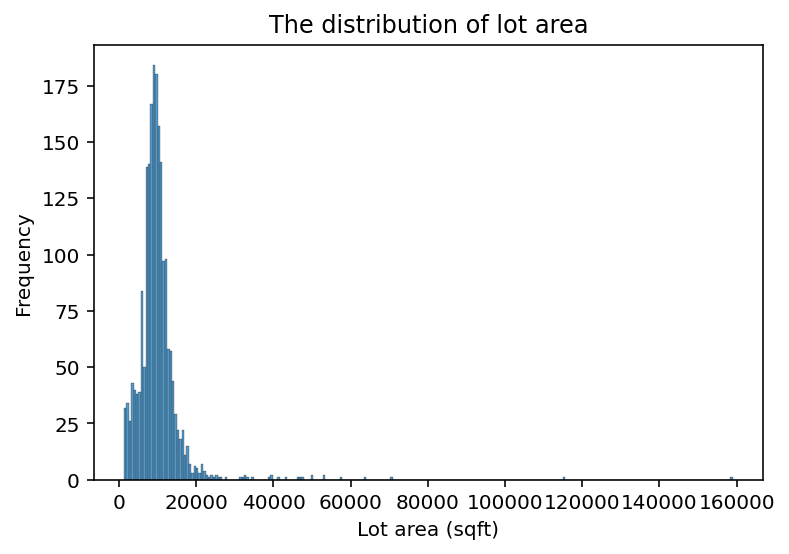

In [18]:
# Lot area distribution
sns.histplot(housing_data["lot_area"])
plt.xlabel('Lot area (sqft)')
plt.ylabel('Frequency')
plt.title('The distribution of lot area');

**Analysis: The distribution of lot area is approximately normally distributed. The presence of the distribution that are positively skewed might suggest the presence of an outlier**

Thus, we will plot a scatterplot of lot area with log saleprice to observe the distribution of lot area in respective to sale price

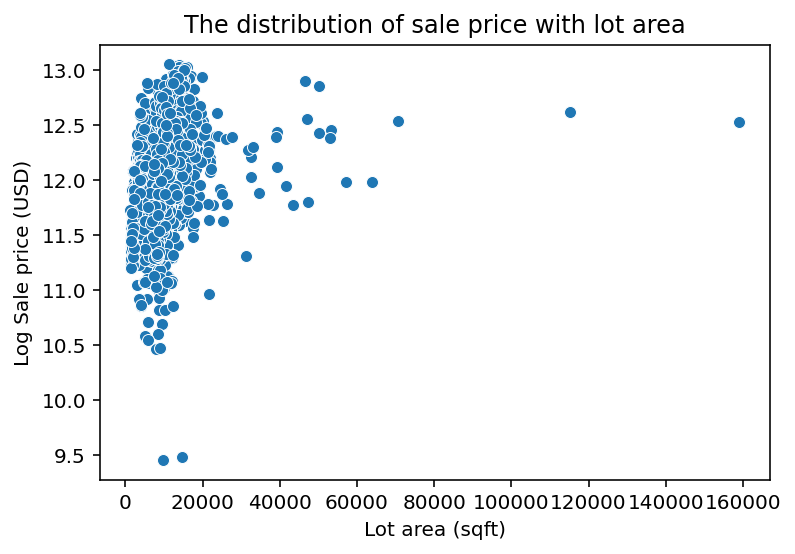

In [19]:
# Lot area with saleprice distribution
sns.scatterplot(x = 'lot_area', y = 'log_saleprice', data = housing_data)
plt.xlabel('Lot area (sqft)')
plt.ylabel('Log Sale price (USD)')
plt.title('The distribution of sale price with lot area');

**Analysis: There are two unusual low sale price observed for above ground living area of more than 120000 sqft, and there are two unusual low sale price observed for a ground living area of less than 20000 sqft.**

We will then remove these outliers and observe the distribution of lot area

Given the distribution of above ground living area is approximately symmetrical, an observation with more than three standard deviations from the mean might suggest to be an outlier.

In [20]:
# To identify outliers

lot_area_mean = np.mean(housing_data.lot_area)
lot_area_std = np.std(housing_data.lot_area)
lower_bound_lot_area = lot_area_mean - (3*lot_area_std)
upper_bound_lot_area = lot_area_mean + (3*lot_area_std)

print(f"The outer_low_range is {0 if lower_bound_lot_area < 0 else round(lower_bound_lot_area,2)}")
print(f"The outer_high_range is {round(upper_bound_lot_area,2)}")

The outer_low_range is 0
The outer_high_range is 29824.48


In [21]:
# Identify the list of outliers
housing_data.loc[(housing_data["lot_area"]>29824), :].head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,saleprice,alley_Grvl,alley_Pave,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,log_saleprice
24,2339,190,RL,100,34650,Pave,3,Bnk,3,Inside,...,145000,0,0,0,1,0,0,0,0,11.884489
107,2309,20,RL,69,39384,Pave,2,Low,3,CulDSac,...,252000,0,0,0,1,0,0,0,0,12.437184
334,2283,190,RL,69,32463,Pave,3,Low,3,Inside,...,168000,0,0,1,0,0,0,0,0,12.031719
438,1639,190,RL,195,41600,Pave,2,Lvl,3,FR2,...,155000,0,0,1,0,0,0,0,0,11.951180
468,2116,50,RL,69,159000,Pave,1,Low,3,CulDSac,...,277000,0,0,0,1,0,0,0,0,12.531773


In [22]:
# To drop the rows of outliers
housing_data = housing_data[housing_data["lot_area"]<29824]
housing_data = housing_data.reset_index(drop=True)

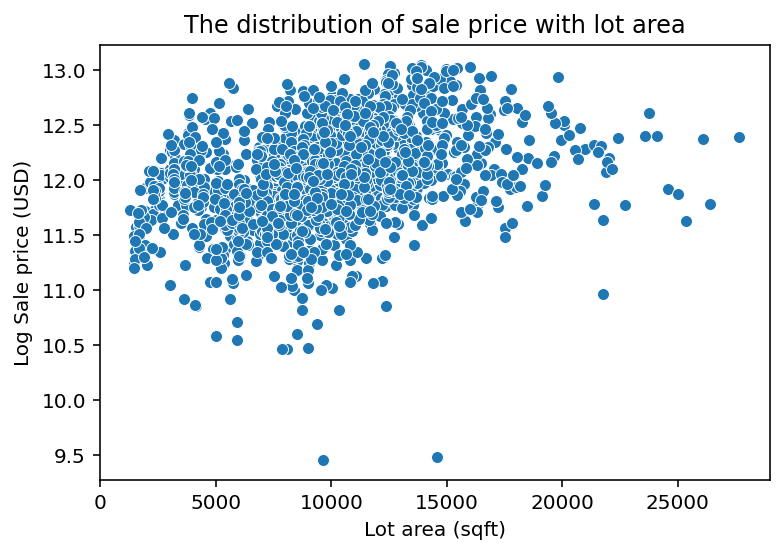

In [23]:
# Lot area with saleprice distribution
sns.scatterplot(x = 'lot_area', y = 'log_saleprice', data = housing_data)
plt.xlabel('Lot area (sqft)')
plt.ylabel('Log Sale price (USD)')
plt.title('The distribution of sale price with lot area');

In [24]:
# Identifying the two unusual low log saleprice of less than 10.0 and ground living area less than 20000 sqft
housing_data.loc[(housing_data["log_saleprice"]<10.0) & (housing_data["lot_area"]<20000), ["log_saleprice", "lot_area"]]

,log_saleprice,lot_area
178,9.480368,14584
1599,9.456341,9656


In [25]:
# Removing the two unusual low log saleprice of less than 10.0 and ground living area less than 20000 sqft
housing_data = housing_data.drop([178, 1599])
housing_data = housing_data.reset_index(drop=True)

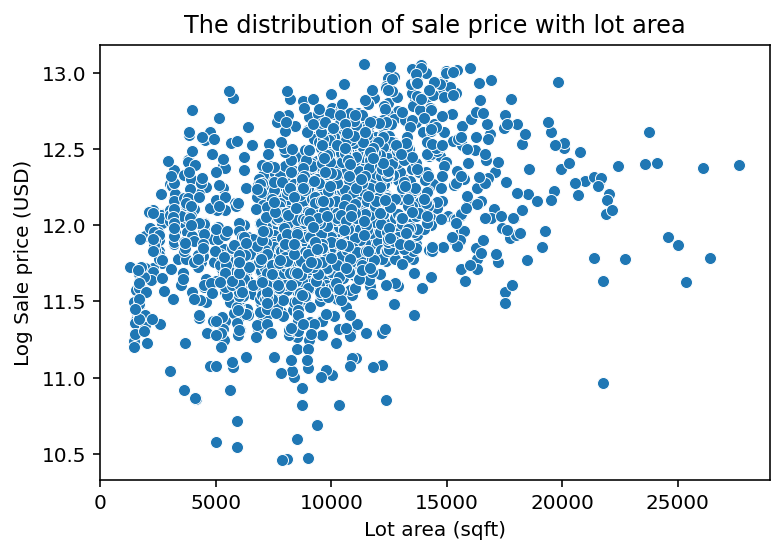

In [26]:
# Lot area with saleprice distribution
sns.scatterplot(x = 'lot_area', y = 'log_saleprice', data = housing_data)
plt.xlabel('Lot area (sqft)')
plt.ylabel('Log Sale price (USD)')
plt.title('The distribution of sale price with lot area');

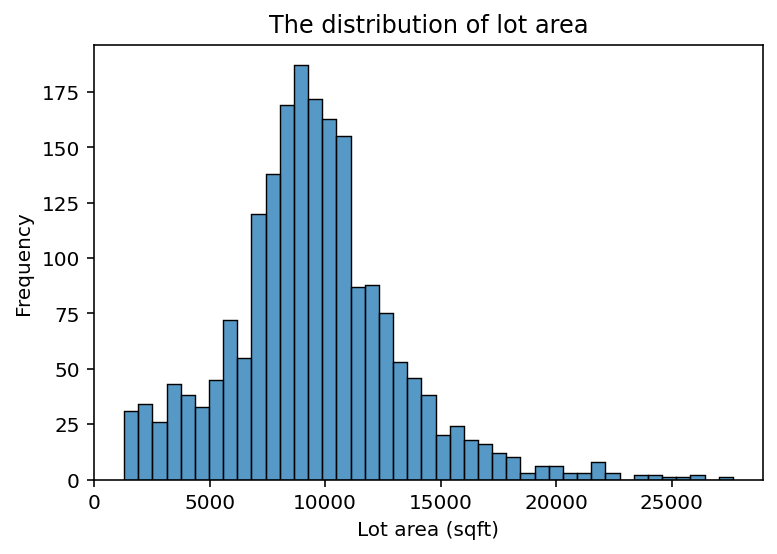

In [27]:
# Lot area distribution
sns.histplot(housing_data["lot_area"])
plt.xlabel('Lot area (sqft)')
plt.ylabel('Frequency')
plt.title('The distribution of lot area');

**Analysis: After removing the outliers, the distribution of sale price with lot area is more normally distributed as observed by the histogram and the scatterplot.**

### 3.2.2.2 Year built  (Age of House)

 To reflect the house year_built, age of the house will be tabulated instead.

In [28]:
housing_data.year_built.describe()

count    2009.000000
mean     1971.570931
std        30.202587
min      1872.000000
25%      1953.000000
50%      1974.000000
75%      2001.000000
max      2010.000000
Name: year_built, dtype: float64

**Analysis: The range of year the house built is before 1900 till 2010. As the dataset consists of the properties sold in Ames, Iowa from 2006 to 2010. Thus, the age of the properties will be calculated from 2010 (at the time the data is collected).**

In [29]:
# To calculate the age from 2010
housing_data["age"] = housing_data["year_built"].map(lambda x: 2010 - x)
housing_data.head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,alley_Grvl,alley_Pave,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,log_saleprice,age
0,109,60,RL,69,13517,Pave,2,Lvl,3,CulDSac,...,0,0,0,1,0,0,0,0,11.779129,34
1,544,60,RL,43,11492,Pave,2,Lvl,3,CulDSac,...,0,0,0,1,0,0,0,0,12.301383,14
2,153,20,RL,68,7922,Pave,3,Lvl,3,Inside,...,0,0,0,0,0,0,0,1,11.599103,57
3,318,60,RL,73,9802,Pave,3,Lvl,3,Inside,...,0,0,0,0,0,1,0,0,12.066811,4
4,255,50,RL,82,14235,Pave,2,Lvl,3,Inside,...,0,0,0,0,0,0,0,1,11.838626,110


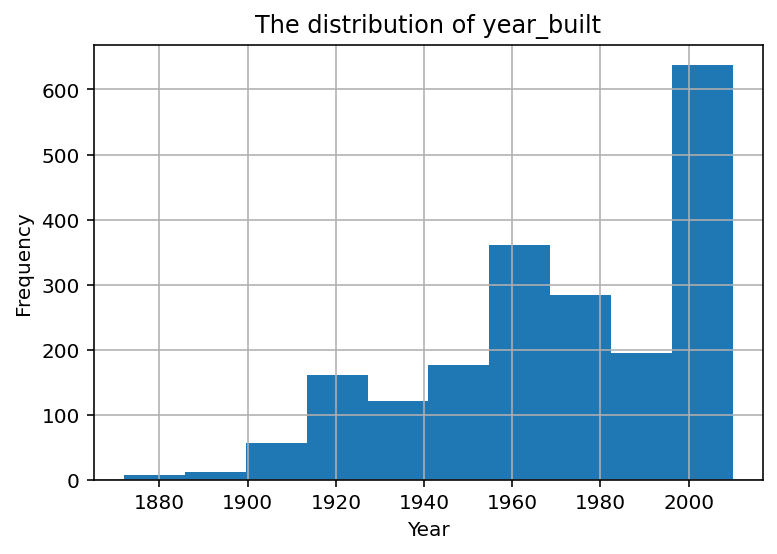

In [30]:
# Distribution of year the house built
housing_data['year_built'].hist();
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('The distribution of year_built');

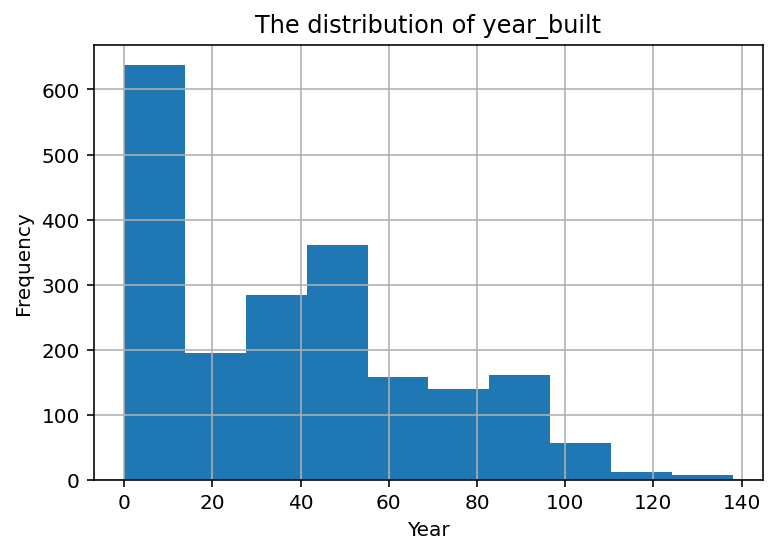

In [31]:
# Distribution of age of house
housing_data['age'].hist();
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('The distribution of year_built');

**Analysis: The distribution of the age is of reflected from the year_built. Thus, the age will be used instead of year built for further analysis.**

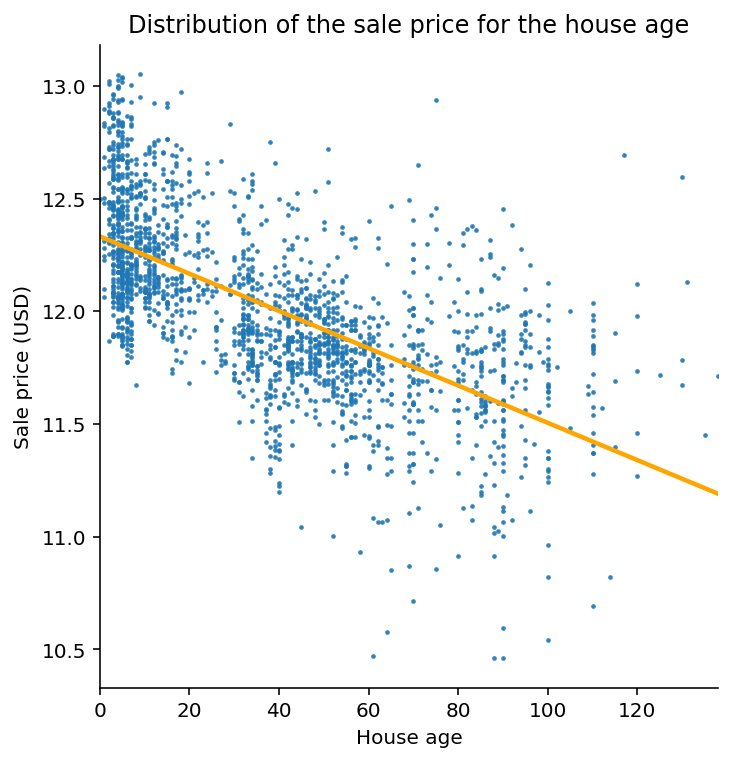

In [32]:
# The distribution of log_saleprice and house age
sns.lmplot(x = 'age', y = 'log_saleprice', data = housing_data, ci = False,fit_reg = True, 
           scatter_kws = {"s":2}, line_kws = {'color':'orange'})
plt.xlabel("House age", fontsize = 10)
plt.ylabel("Sale price (USD)", fontsize = 10)
plt.title("Distribution of the sale price for the house age");

**Analysis: The distribution of the age with saleprice suggests a strong correlation. Thus, the age will be used as a potential feature for modeling.**

### 3.2.2.3 Street

In [33]:
housing_data.street.unique()

array(['Pave', 'Grvl'], dtype=object)

Question: Is the saleprice different by the type of road access to property?

The null hypothesis, $H_0:$ There is no difference in saleprice by the type of road access to property.

The alternative hypothesis, $H_A:$ There is a difference in saleprice by the type of road access to property.

$$
\begin{eqnarray*}
&H_0:& \mu_1 = \mu_2 \\
&H_A:& \mu_1 \neq \mu_2
\end{eqnarray*}
$$

We will conduct this test assuming $\alpha=0.05$.

In [34]:
ttest_ind(housing_data[housing_data['street'] == 'Pave']['log_saleprice'],
          housing_data[housing_data['street'] == 'Grvl']['log_saleprice'])

Ttest_indResult(statistic=4.915439069970206, pvalue=9.577269672980496e-07)

The $t$-statistic is 4.92 and the $p$-value is smaller than 0.05. As $p$-value is smaller than $\alpha$, we reject our null hypothesis and accept the alternative hypothesis. This means that we accept that the salesprice is different with the type of road access to property between paved and gravel.

### 3.2.2.4 Analysis

In [35]:
# Dummify encode the central air as there is a potential correlation with log saleprice
housing_data = pd.get_dummies(columns = ['street'], drop_first = True, data = housing_data)

In [36]:
# Physical House features
phyhouse_data = housing_data[["lot_frontage", "lot_area", "street_Pave", "alley_Grvl","alley_Pave","lot_shape","land_slope","overall_qual", "overall_cond","age", "functional", "log_saleprice"]]

<AxesSubplot:>

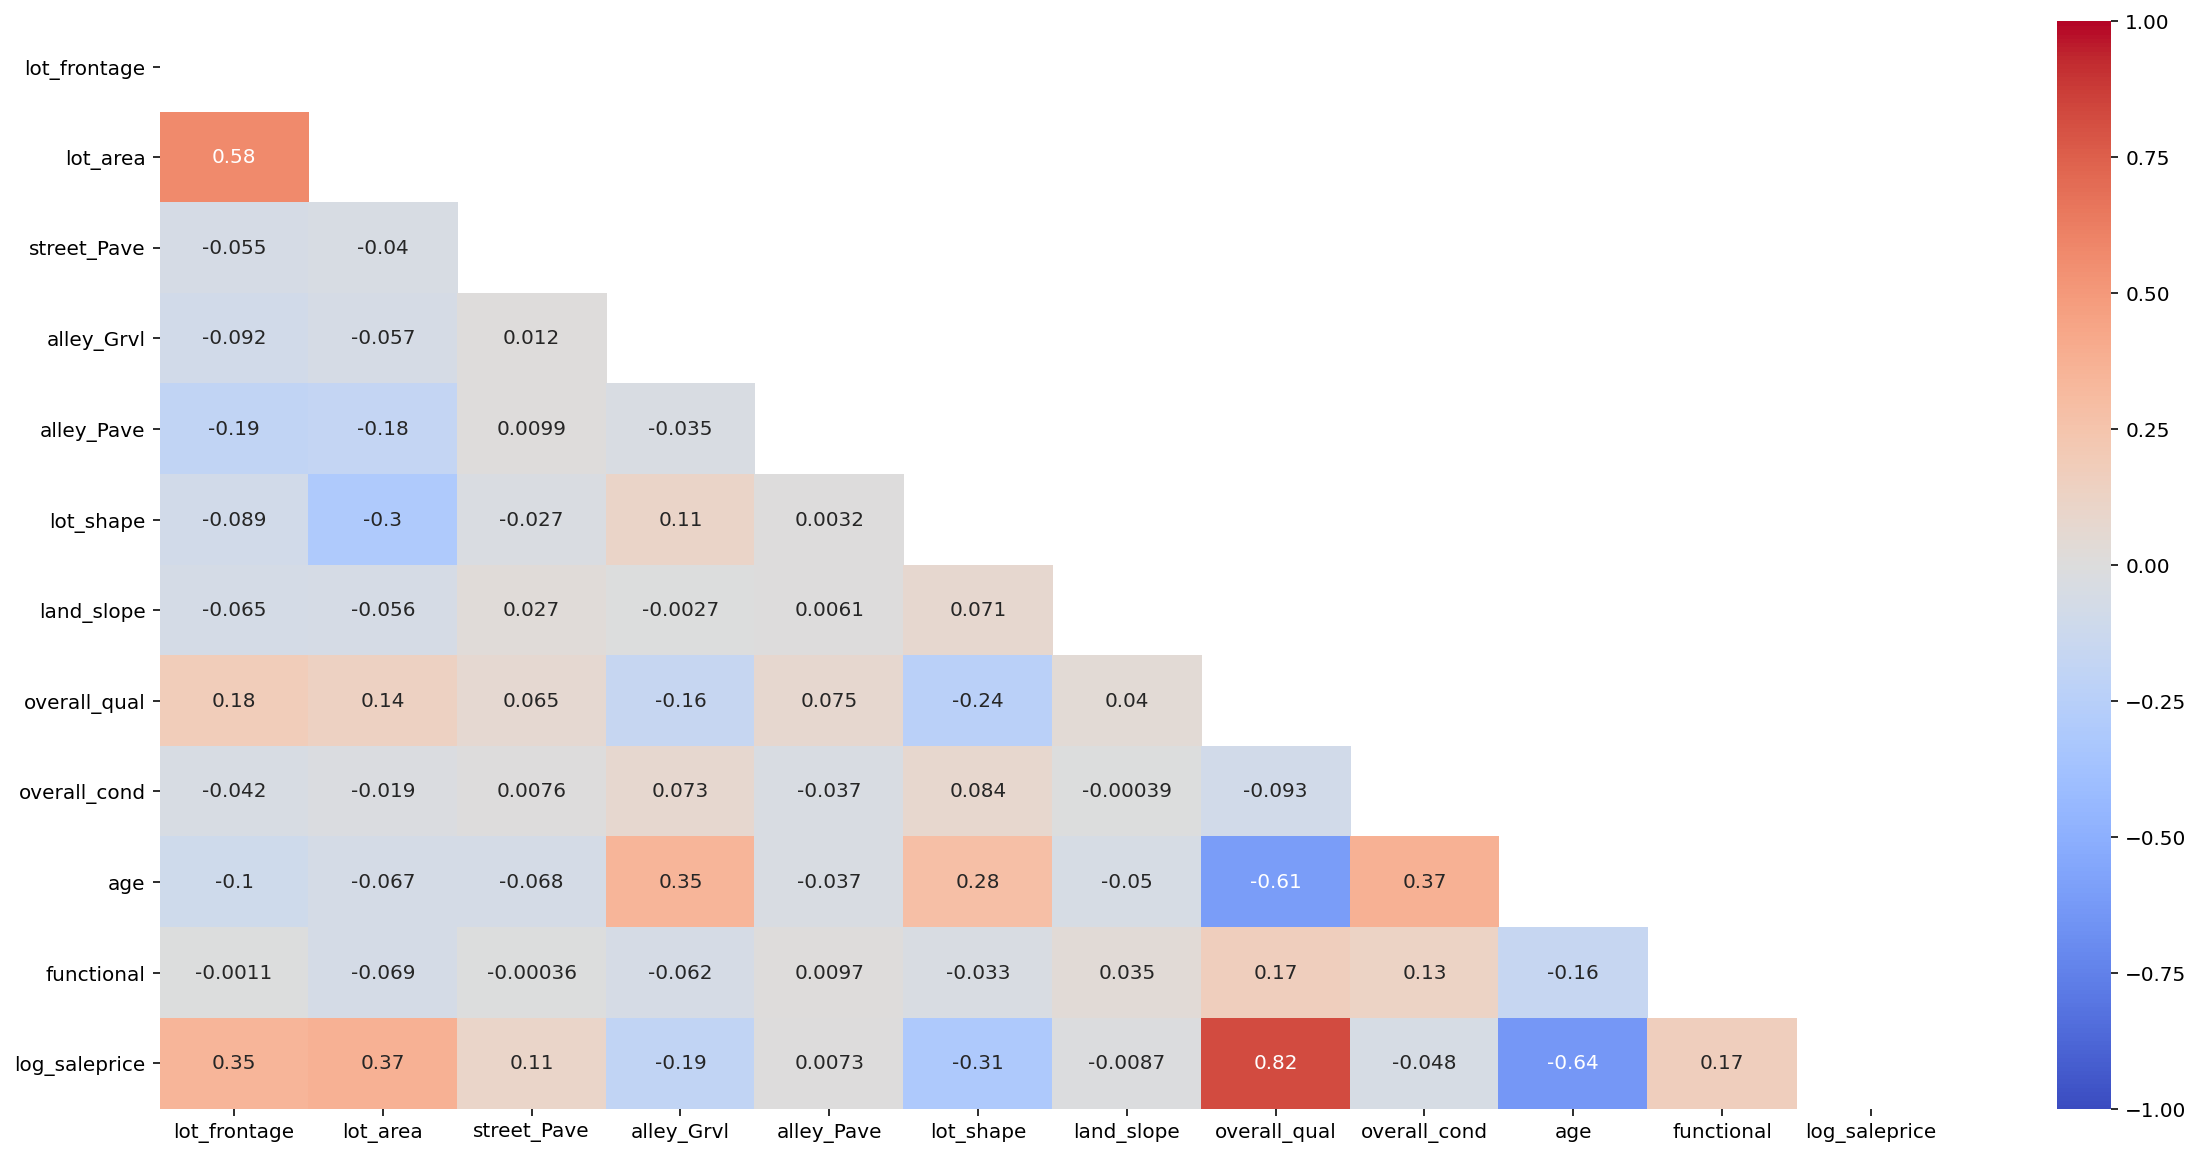

In [37]:
# Heatmap of the physical house features with its correlation to log saleprice
plt.figure(figsize = [20,10])
sns.heatmap(phyhouse_data.corr(), annot = True, mask = np.triu(phyhouse_data.corr()), vmin = -1, vmax =1, cmap = 'coolwarm')

**Analysis: The strong correlation with log_saleprice is overall quality and age.**

Overall quality has a strong correlation of 0.82 with log_saleprice while age has a moderate correlation of 0.64 with log_saleprice. Thus, these two features will be used for further analysis.

**Summary: The overall quality and age will be used for further studies in modeling. In addition, the house style and ms zoning will be included in the studies.**

### 3.2.3 House Material and Foundation

The house material and foundation include roof style, roof material, exterior 1, exterior 2, masonry veneer type, masonry veneer area, exterior quality, exterior condition, foundation.

Buyer Interest : Exterior Roofing, Exterior House (general)

Most of the features are nominal data, which comprises of a lot of variables in one categorical feature. To reflect the overall satisfaction of the buyer on the house material and foundation, we can use exterior quality and exterior condition as features for futher analysis.

In [38]:
housing_data["mas_vnr_area"].describe()

count    2009.000000
mean       93.335490
std       163.368122
min         0.000000
25%         0.000000
50%         0.000000
75%       150.000000
max      1600.000000
Name: mas_vnr_area, dtype: float64

**Analysis: There is a lot of properties that do not have any mansory veneer, that comprises of about 50% of the proportion.**

In [39]:
# House Material features
material_data = housing_data[["mas_vnr_area", "exter_qual","exter_cond", "log_saleprice"]]

<AxesSubplot:>

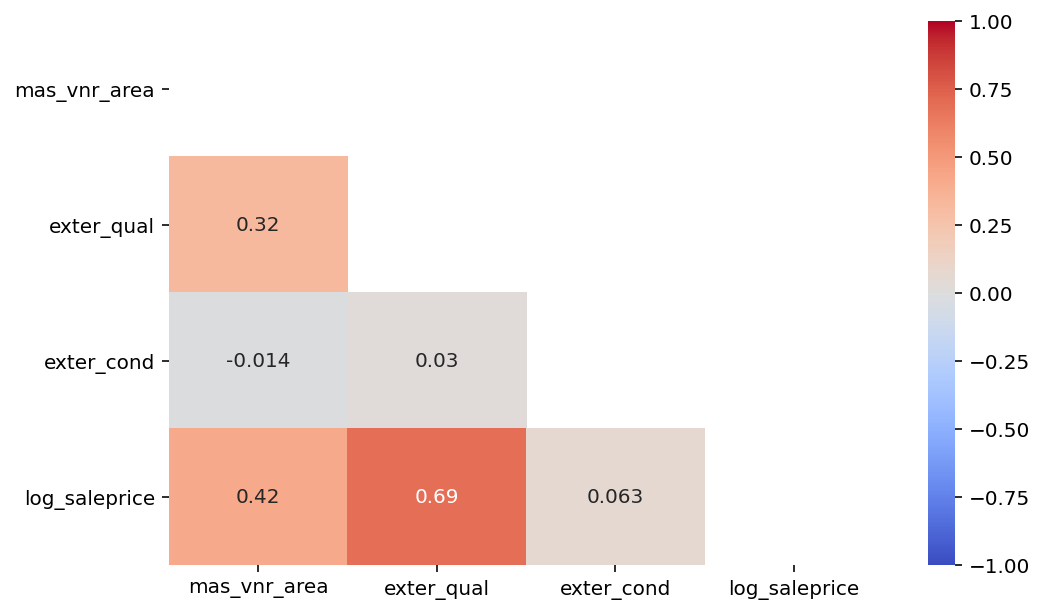

In [40]:
# Heatmap of the house material features with its correlation to log saleprice
plt.figure(figsize = [8,5])
sns.heatmap(material_data.corr(), annot = True, mask = np.triu(material_data.corr()), vmin = -1, vmax =1, cmap = 'coolwarm')

**Analysis: The strong correlation with log_saleprice is external quality.**

External quality has a strong correlation of 0.69 with log_saleprice and it will be used for further analysis.

**Summary: The external quality will be used for further studies in modeling.**

### 3.2.4 Rooms

The rooms includes first floor square feet, second floor square feet, low quality finished square feet, Above grade living area, basement full bath, basement half bath, full bath (above grade), half bath (above grade), bedroom (above grade), kitchen, kitchen quality and total rooms above grade (not including bathrooom).

Buyer Interest: Bedroom, Bath, Above Ground Living Area,  Total rooms above ground.

In [41]:
# Summary statistics of continuous features in rooms
housing_data[['first_flr_sf', 'second_fld_sf', 'low_qual_fin_sf', 'gr_liv_area']].describe()

,first_flr_sf,second_fld_sf,low_qual_fin_sf,gr_liv_area
count,2009.000000,2009.000000,2009.000000,2009.000000
mean,1147.452962,328.905426,5.343454,1481.701842
std,362.204060,422.395962,50.021156,468.907091
min,334.000000,0.000000,0.000000,334.000000
25%,876.000000,0.000000,0.000000,1125.000000
50%,1088.000000,0.000000,0.000000,1437.000000
75%,1377.000000,690.000000,0.000000,1720.000000
max,3228.000000,1836.000000,1064.000000,3672.000000


**Analysis: The distribution across these graphs are non-symmetrical with a significant proportion of the properties do not have second_floor or low quality finished.**

In [42]:
# Perform a correlation of the four continous features
rooms_four = housing_data[['first_flr_sf', 'second_fld_sf', 'low_qual_fin_sf', 'gr_liv_area', 'log_saleprice']]
rooms_four.corr()["log_saleprice"].sort_values(ascending = False)

log_saleprice      1.000000
gr_liv_area        0.700937
first_flr_sf       0.618298
second_fld_sf      0.256063
low_qual_fin_sf   -0.068679
Name: log_saleprice, dtype: float64

**Analysis: This indicate that there is a strong correlation between ground living area and first floor area with log saleprice.**

As ground living area is comprises of first floor area and second floor area, we will not be including the first floor area due to co-linearity. Thus, we wiill be only looking at the above ground living area.

### 3.2.4.1 Distribution of above ground living area

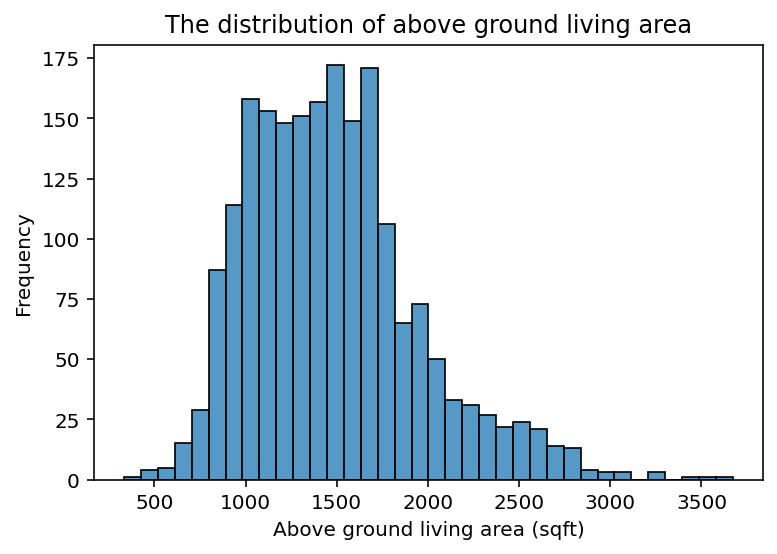

In [43]:
# Above ground living area distribution
sns.histplot(housing_data["gr_liv_area"])
plt.xlabel('Above ground living area (sqft)')
plt.ylabel('Frequency')
plt.title('The distribution of above ground living area');

**Analysis: The distribution of above ground living area is approximately symmetrical with slightly positively skewed**

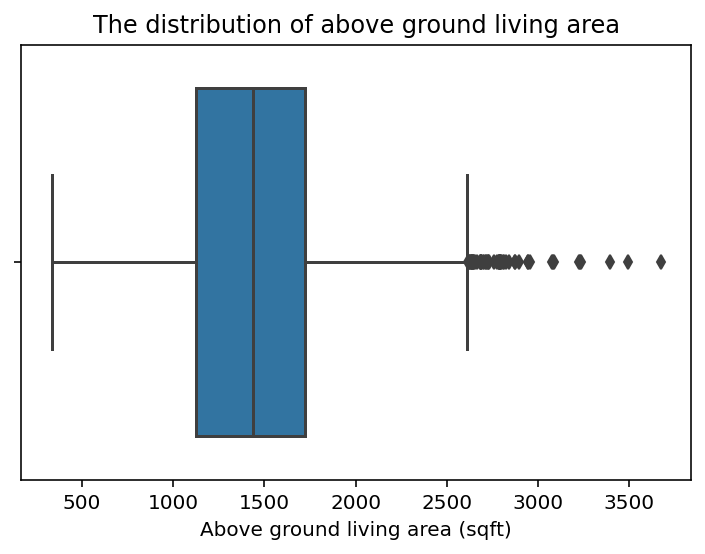

In [44]:
# The distribution of above ground living area
sns.boxplot(data = housing_data, x = "gr_liv_area")
plt.xlabel('Above ground living area (sqft)')
plt.title('The distribution of above ground living area');

**Analysis: The distribution of above ground living area is approximately symmetrical with the presence of some outliers**

In [45]:
# To identify outliers

percentile_25 = np.percentile(housing_data["gr_liv_area"], 25)
percentile_75 = np.percentile(housing_data["gr_liv_area"], 75)
interquartile_range = percentile_75 - percentile_25
data_range_low_outer = percentile_25 - (3*interquartile_range)
data_range_high_outer = percentile_75 + (3*interquartile_range)

print(f"The outer_low_range is {0 if data_range_low_outer < 0 else data_range_low_outer}")
print(f"The outer_high_range is {data_range_high_outer}")

The outer_low_range is 0
The outer_high_range is 3505.0


In [46]:
housing_data.loc[(housing_data["gr_liv_area"]>3505), :]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,utilities,lot_config,land_slope,...,alley_Pave,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,log_saleprice,age,street_Pave
1856,2738,75,RL,60,19800,3,Lvl,3,Inside,2,...,0,0,0,0,0,0,1,12.936034,75,1


In [47]:
# To remove the outlier
housing_data = housing_data[housing_data["gr_liv_area"]<3505]
housing_data = housing_data.reset_index(drop=True)

**Analysis: The distribution of above ground living area has one extreme outlier that falls beyond the outer fence limit and it has been removed.**

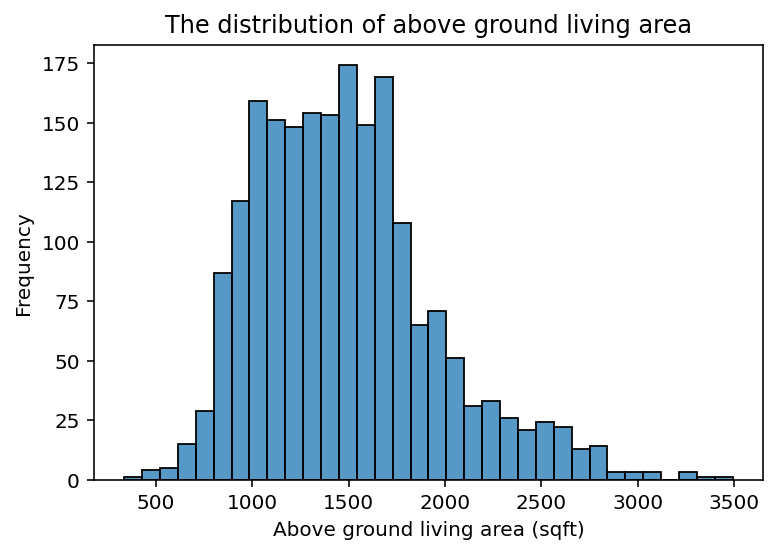

In [48]:
# Above ground living area distribution
sns.histplot(housing_data["gr_liv_area"])
plt.xlabel('Above ground living area (sqft)')
plt.ylabel('Frequency')
plt.title('The distribution of above ground living area');

**Analysis: The distribution of above ground living area is similar with the initial distribution seen, which is approximately symmterical.**

### 3.2.4.2 Analysis of the correlation with log saleprice

In [49]:
#List of rooms feature
rooms_data = housing_data[['first_flr_sf', 'second_fld_sf', 'low_qual_fin_sf', 'gr_liv_area', 'full_bath', 'half_bath','bsmt_full_bath', 'bsmt_half_bath','bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'log_saleprice']]

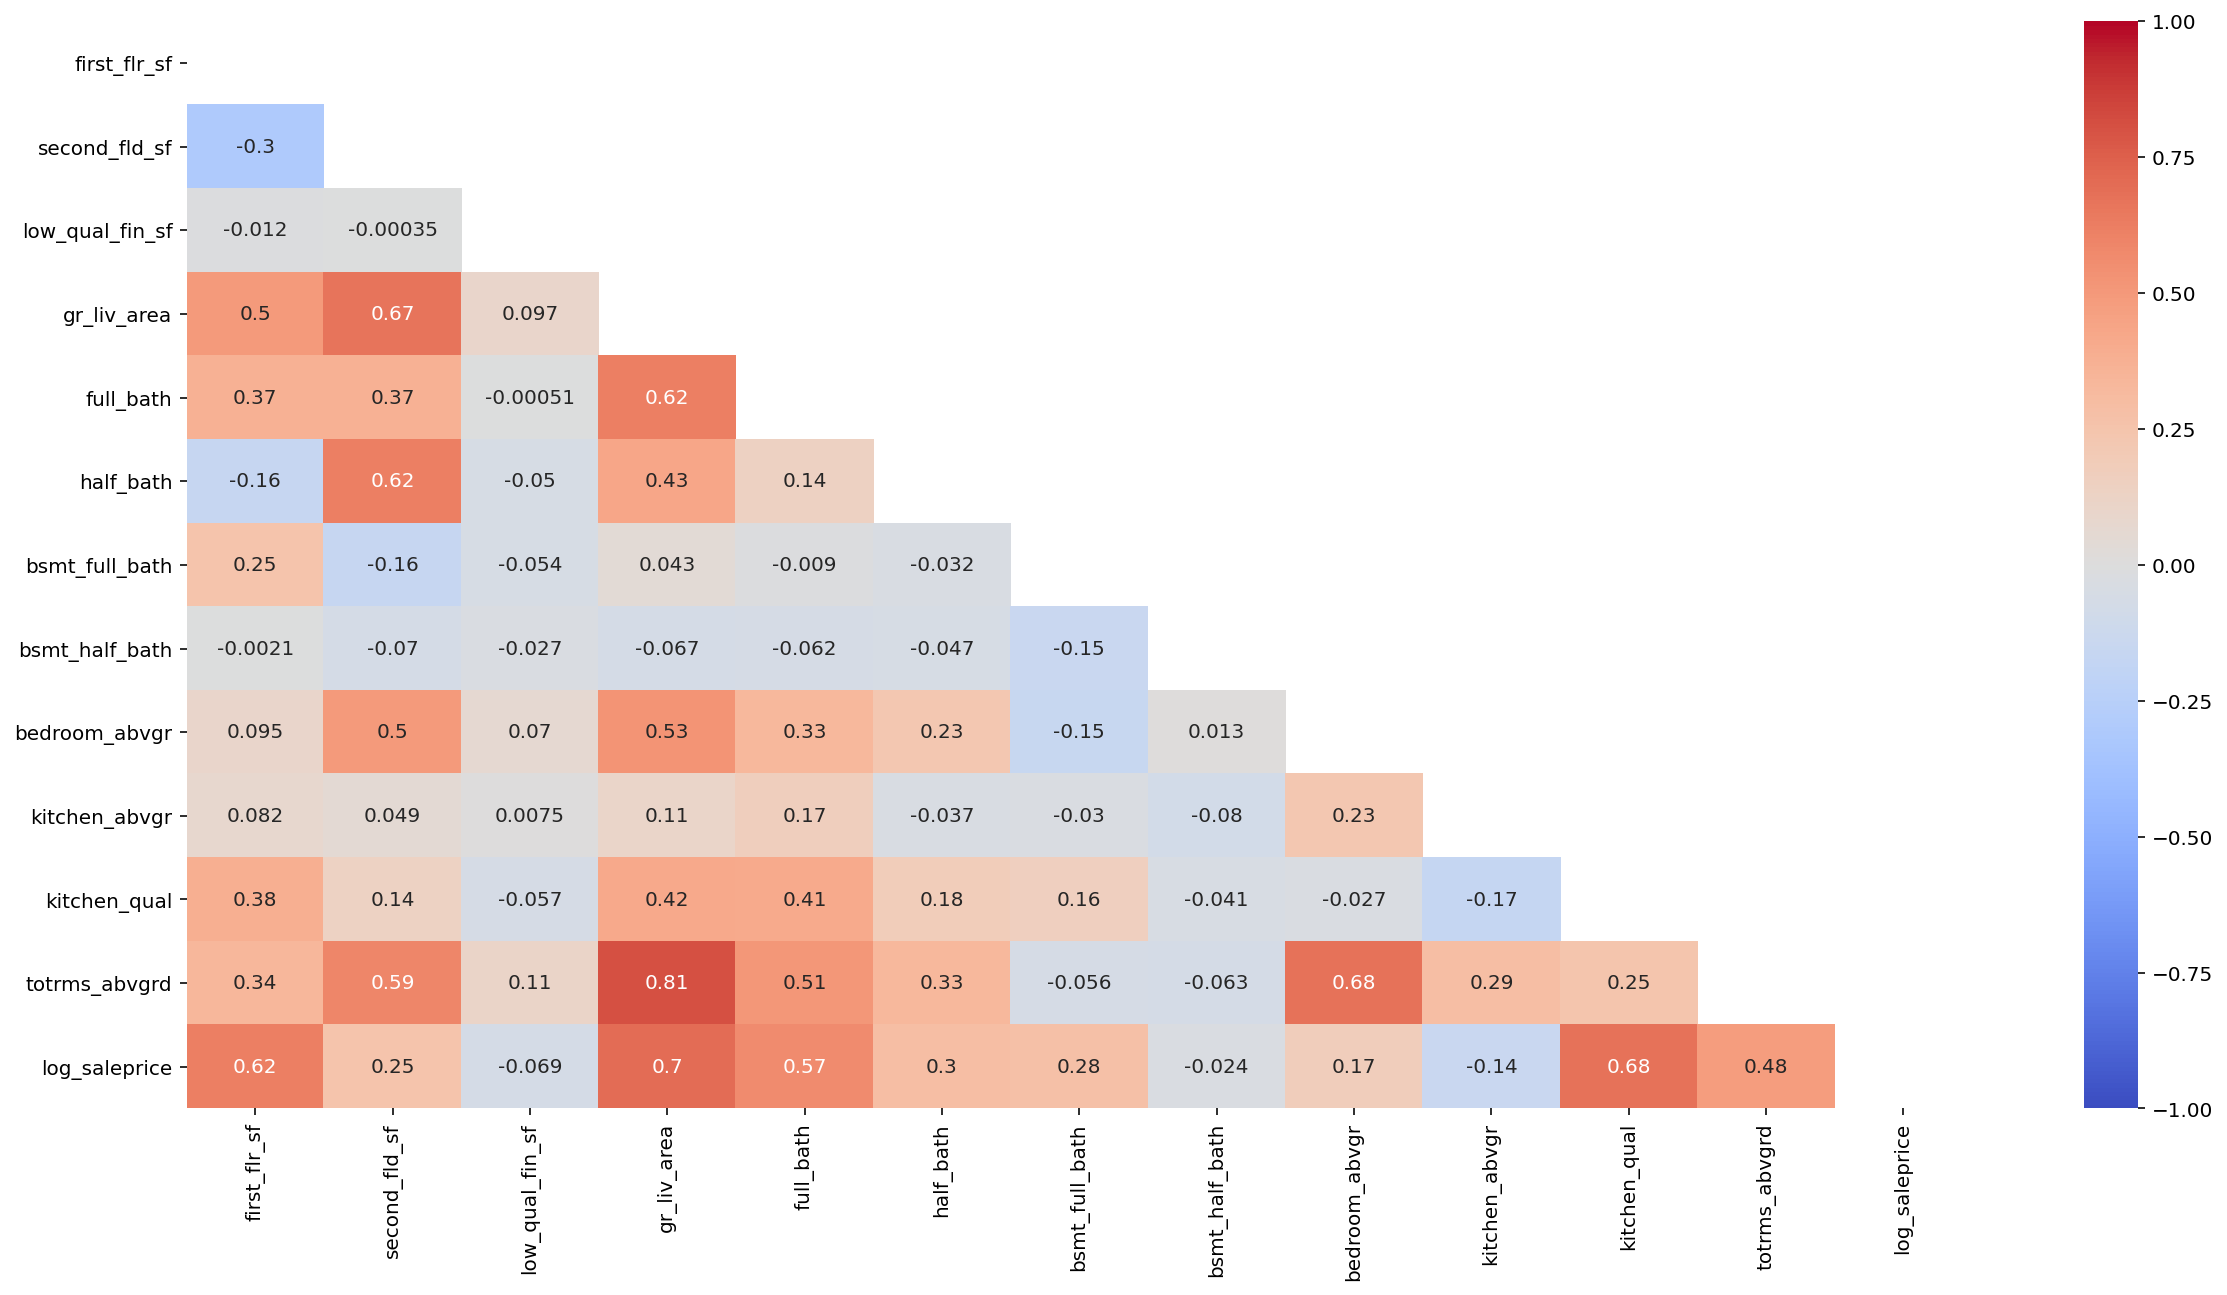

In [50]:
#Heatmap of rooms features with correlation with log saleprice
plt.figure(figsize = [20,10])
sns.heatmap(rooms_data.corr(), annot = True, mask = np.triu(rooms_data.corr()), vmin = -1, vmax =1, cmap = 'coolwarm');

**Analysis: The above grade living area, kitchen quality, first floor area and full bath has a correlation with log saleprice.**

The above grade living area has a relatively strong correlation of 0.7 with log saleprice. The other includes kitchen quality, first floor area and full bath. As the above grade living area comprise of first floor and second floor area, the first floor area will be excluded from further studies. The other four features, which are above grade living area, kitchen quality, and full bath will be included in further studies for modeling.

**Summary: The above grade living area, kitchen quality and full bath will be included for further studies.**

### 3.2.5 Basement

The basement includes basement quality, basement condition, basement exposure, basement finished type 1, basemenet finished square feet 1, basement finished type 2, basement finished square feet 2, basement unfinished square feet, total basement square feet.

Buyer Interest: Basement 

In [51]:
housing_data[["bsmtfin_sf_1","bsmtfin_sf_2", "bsmt_unf_sf","total_bsmt_sf"]].describe()

,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf
count,2008.000000,2008.000000,2008.000000,2008.000000
mean,429.041833,47.214641,565.995518,1042.251992
std,427.640272,161.764376,441.410602,411.155698
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,221.750000,789.000000
50%,363.500000,0.000000,474.500000,989.500000
75%,725.500000,0.000000,810.000000,1302.000000
max,1972.000000,1474.000000,2336.000000,3206.000000


**Analysis: The non-symmetrical distribution across the 4 features with a significant proportion (about 75%) of the properties do not have basement type 2 finished with quite a proportion (50%) of the properties do not have basement type 1 finished.**

In [52]:
# Correlation of the four continuous feature with log saleprice
basement_four = housing_data[["bsmtfin_sf_1","bsmtfin_sf_2", "bsmt_unf_sf","total_bsmt_sf", "log_saleprice"]]
basement_four.corr()["log_saleprice"].sort_values(ascending = False)

log_saleprice    1.000000
total_bsmt_sf    0.641035
bsmtfin_sf_1     0.414989
bsmt_unf_sf      0.189940
bsmtfin_sf_2     0.013954
Name: log_saleprice, dtype: float64

**Analysis: Only total_bmst_sf has a correlation of more than 0.5 with log_saleprice, thus we will be focusing on this feature.**

### 3.2.5.1 Distribution of the total basement area

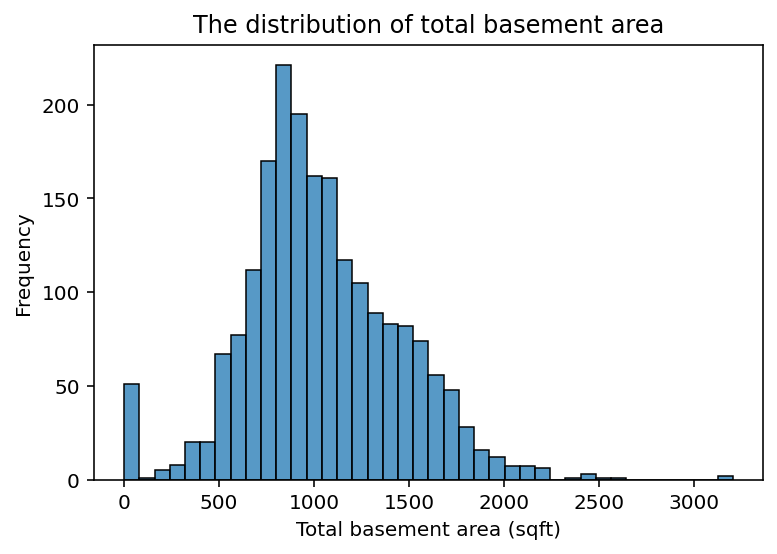

In [53]:
# Total basement area distribution
sns.histplot(housing_data["total_bsmt_sf"])
plt.xlabel('Total basement area (sqft)')
plt.ylabel('Frequency')
plt.title('The distribution of total basement area');

**Analysis: The distribution of above total basement area is approximately symmetrical with slightly positively skewed**

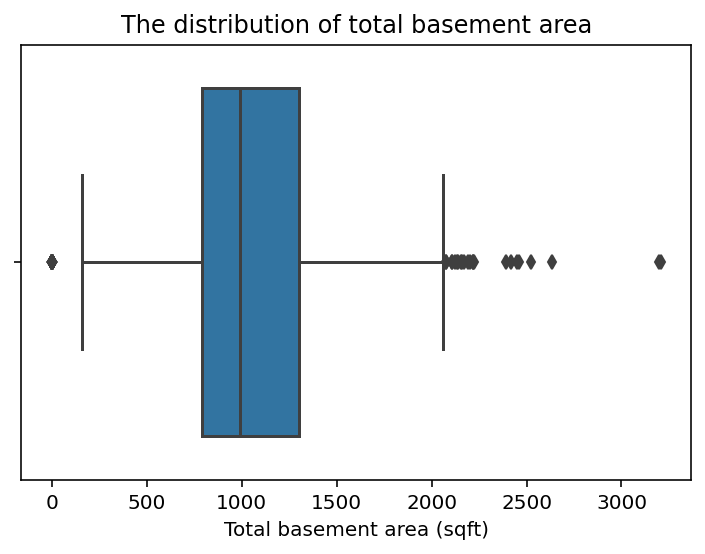

In [54]:
# The distribution of total basement area
sns.boxplot(data = housing_data, x = "total_bsmt_sf")
plt.xlabel('Total basement area (sqft)')
plt.title('The distribution of total basement area');

**Analysis: The distribution of total basement area is approximately symmetrical with the presence of some outliers**

In [55]:
# To identify outliers

percentile_25 = np.percentile(housing_data["total_bsmt_sf"], 25)
percentile_75 = np.percentile(housing_data["total_bsmt_sf"], 75)
interquartile_range = percentile_75 - percentile_25
data_range_low_outer = percentile_25 - (3*interquartile_range)
data_range_high_outer = percentile_75 + (3*interquartile_range)

print(f"The outer_low_range is {0 if data_range_low_outer < 0 else data_range_low_outer}")
print(f"The outer_high_range is {data_range_high_outer}")

The outer_low_range is 0
The outer_high_range is 2841.0


In [56]:
housing_data.loc[(housing_data["total_bsmt_sf"]>2841), :]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,utilities,lot_config,land_slope,...,alley_Pave,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,log_saleprice,age,street_Pave
322,1773,20,RL,69,12692,2,Lvl,3,Inside,2,...,0,0,1,0,0,0,0,12.97154,18,1
1124,445,20,RL,85,10655,2,Lvl,3,Inside,2,...,0,0,1,0,0,0,0,12.55673,7,1


In [57]:
housing_data = housing_data[housing_data["total_bsmt_sf"]<2841]
housing_data = housing_data.reset_index(drop=True)

**Analysis: The distribution of total basement area has two extreme outlier that falls beyond the outer fence limit and it has been removed.**

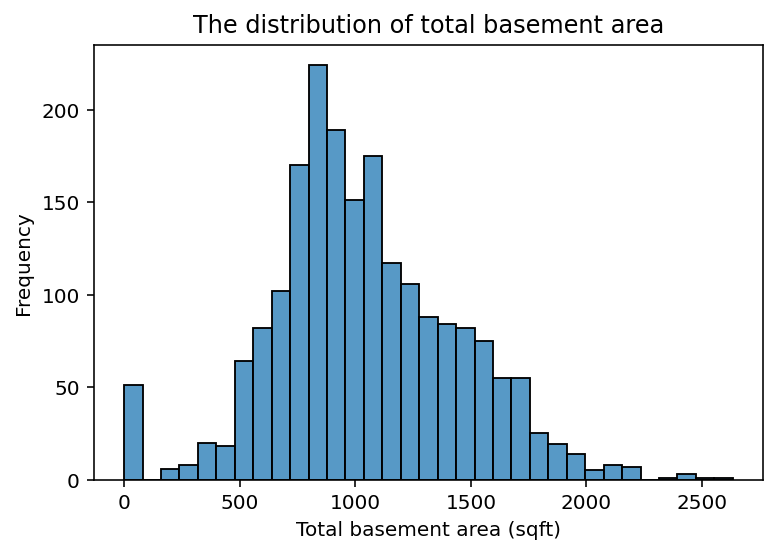

In [58]:
# Total basement area distribution
sns.histplot(housing_data["total_bsmt_sf"])
plt.xlabel('Total basement area (sqft)')
plt.ylabel('Frequency')
plt.title('The distribution of total basement area');

**Analysis: The distribution of above ground living area is similar with the initial distribution seen, which is approximately symmterical.**

### 3.2.5.2 Analysis of the correlation with log saleprice

In [59]:
#List of basement features
basement_data = housing_data[["bsmt_qual", "bsmt_cond", "bsmt_exposure", "bsmtfin_type_1", "bsmtfin_sf_1","bsmtfin_type_2","bsmtfin_sf_2", "bsmt_unf_sf","total_bsmt_sf", "log_saleprice"]]

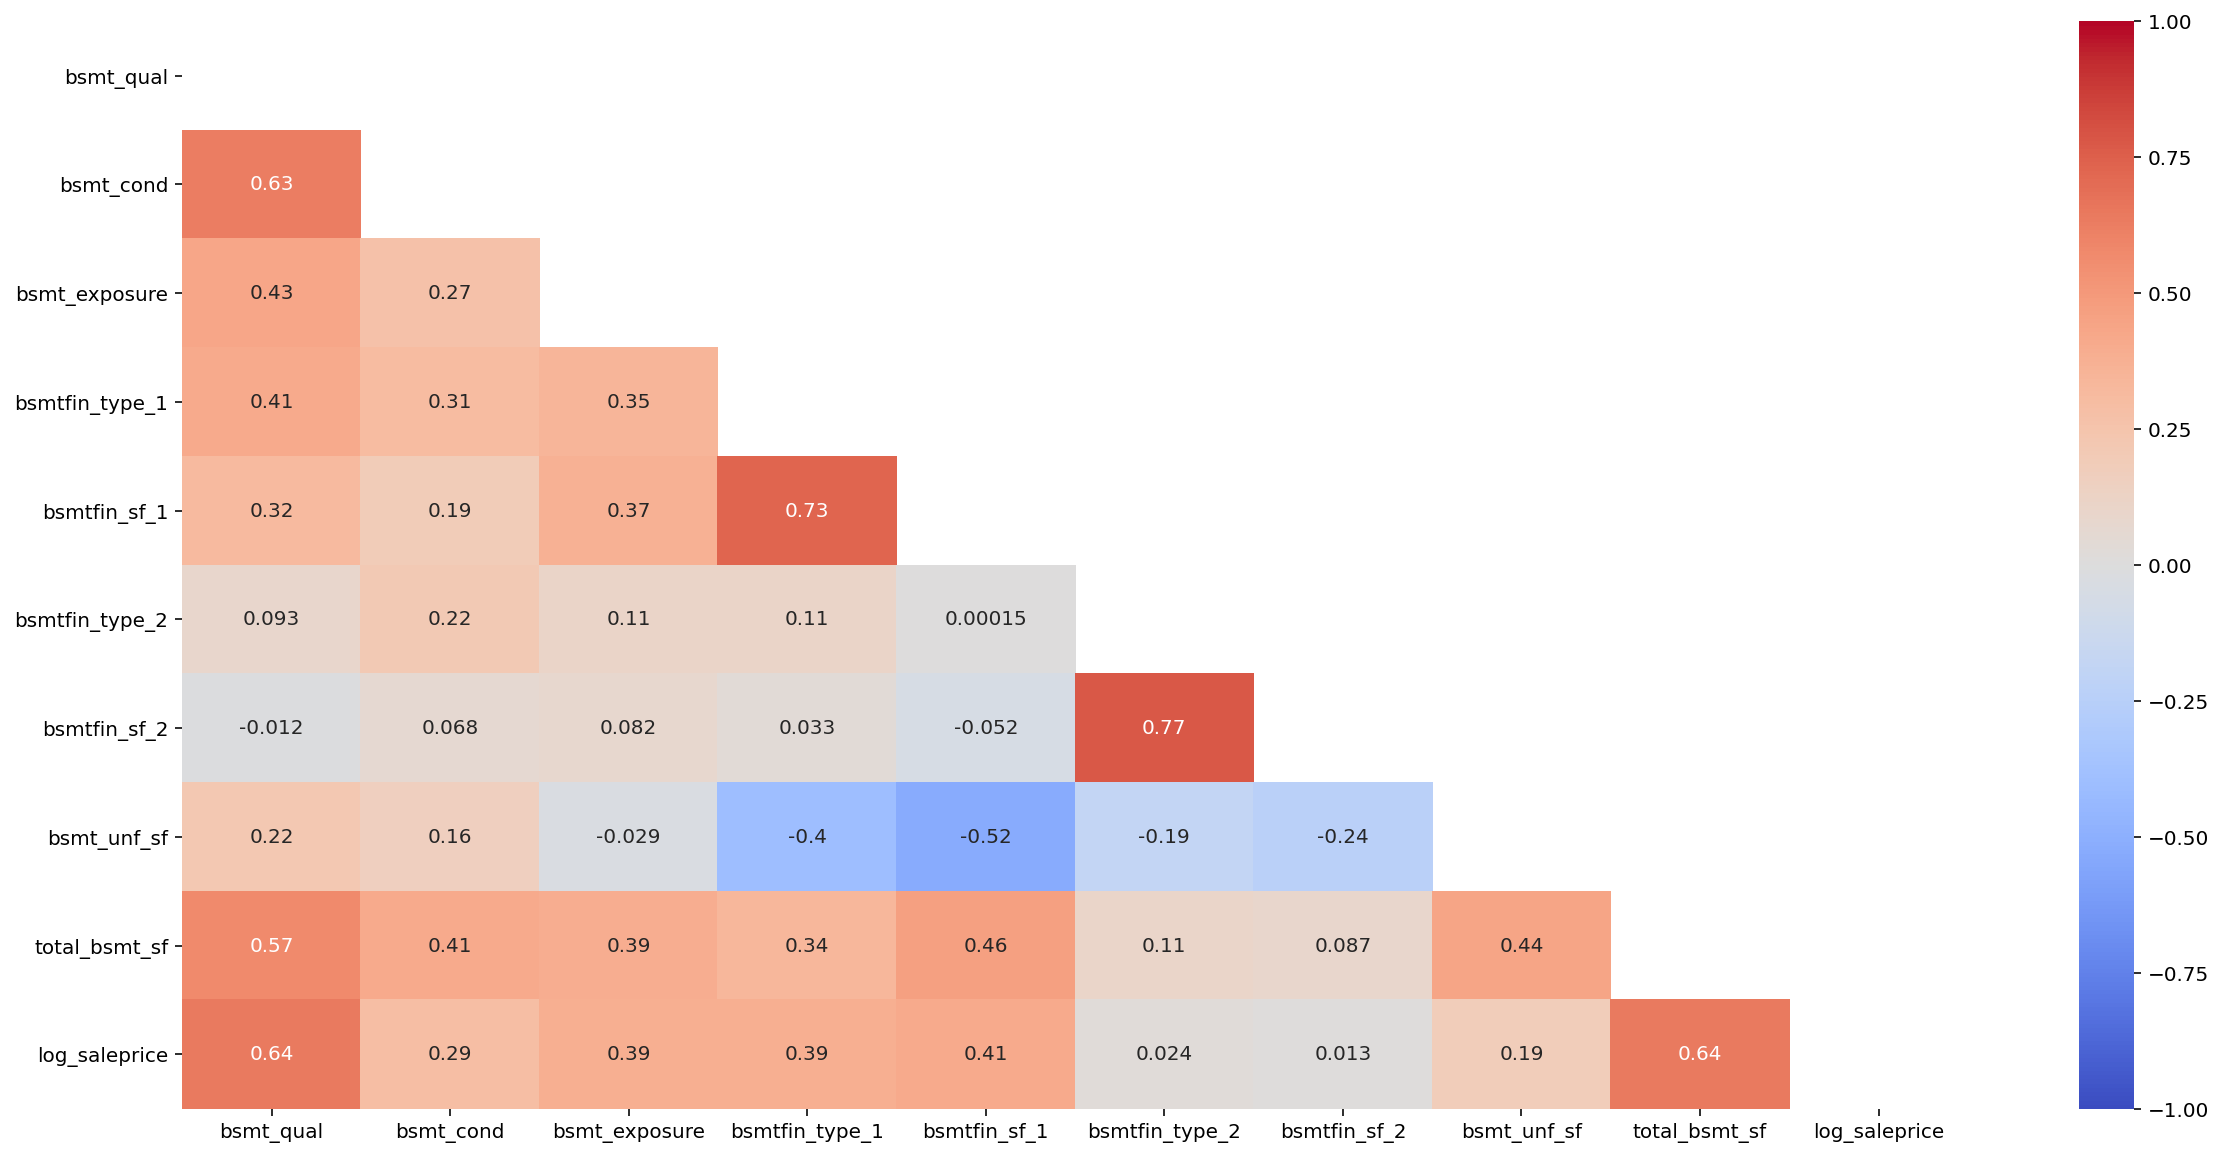

In [60]:
#Heatmap of basement features with correlation with log saleprice
plt.figure(figsize = [20,10])
sns.heatmap(basement_data.corr(), annot = True, mask = np.triu(basement_data.corr()), vmin = -1, vmax =1, cmap = 'coolwarm');

**Analysis: Basement features of bsmt_qual and total_bsmt_sf has a strong correlation with log saleprice.**

bsmt_qual and total_bsmt_sf has a strong correlation with log saleprice. Thus, we will be using these features to feature the interaction term to observe if there is any improvement.

In [61]:
# Interaction between basement quality and total basement area
housing_data["bsmt_qual_total"] = housing_data['bsmt_qual']* housing_data['total_bsmt_sf']

In [62]:
# List comprising the new interaction term
basement_data_new = housing_data[["bsmt_qual", "bsmt_cond", "bsmt_exposure", "bsmtfin_type_1", "bsmtfin_sf_1","bsmtfin_type_2","bsmtfin_sf_2", "bsmt_unf_sf","total_bsmt_sf", "bsmt_qual_total","log_saleprice"]]

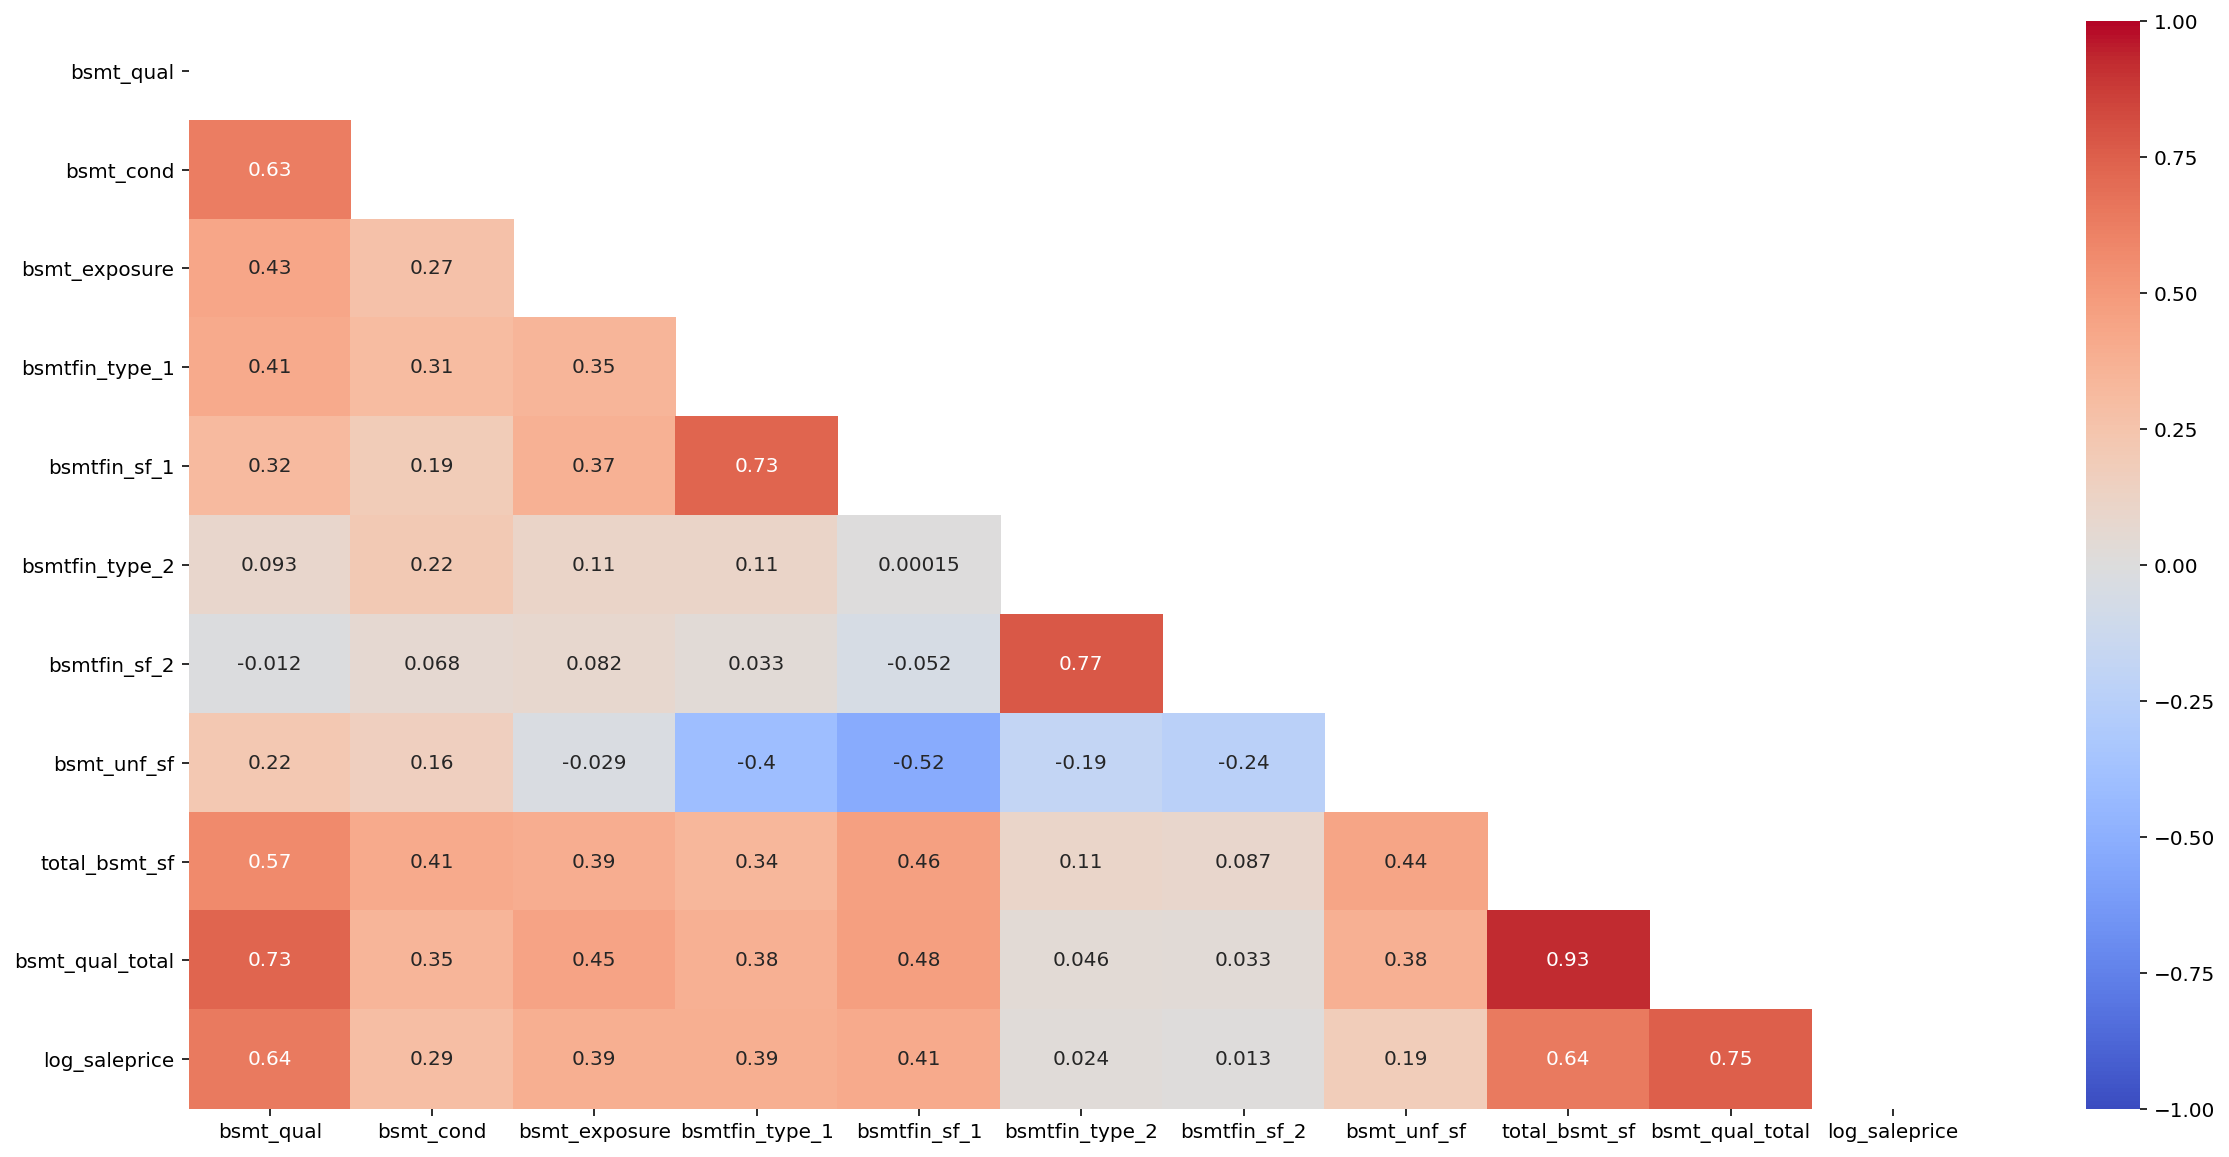

In [63]:
# Heatmap of basement features inclusive of the new interaction terms and the correlation with log_saleprice
plt.figure(figsize = [20,10])
sns.heatmap(basement_data_new.corr(), annot = True, mask = np.triu(basement_data_new.corr()), vmin = -1, vmax =1, cmap = 'coolwarm');

**Analysis: bsmt_qual_total has a strongest correlation with the log_saleprice, thus bmst_qual, total_bsmt_sf and bsmt_qual_total will be used for further analysis**

The interaction term of bsmt_qual and total_bsmt_sf has a stronger correlation with log_saleprice compared to the individual features. Thus, these features will be used for further analysis.

**Summary: bsmt_qual_total, bsmt_qual and total_bsmt_sf will be included for further analysis**

### 3.2.6 Garage

The garage includes garage type, garage year built, garage finish, garage cars, garage area, garage quality and garage condition

Buyer Interest: Garage Cars

As garage quality and garage condition can be of reflective of garage type and garage year built, we will be using garage quality and garage condition to observe the correlation with log_saleprice.

In [64]:
housing_data.garage_area.describe()

count    2006.000000
mean      466.504985
std       209.727415
min         0.000000
25%       312.000000
50%       478.000000
75%       576.000000
max      1314.000000
Name: garage_area, dtype: float64

**Analysis: An approximately symmetrical distribution of the garage_area with a mean of 466 sqft and standard deviation of 210.**

### 3.2.6.1 Distribution of garage_area

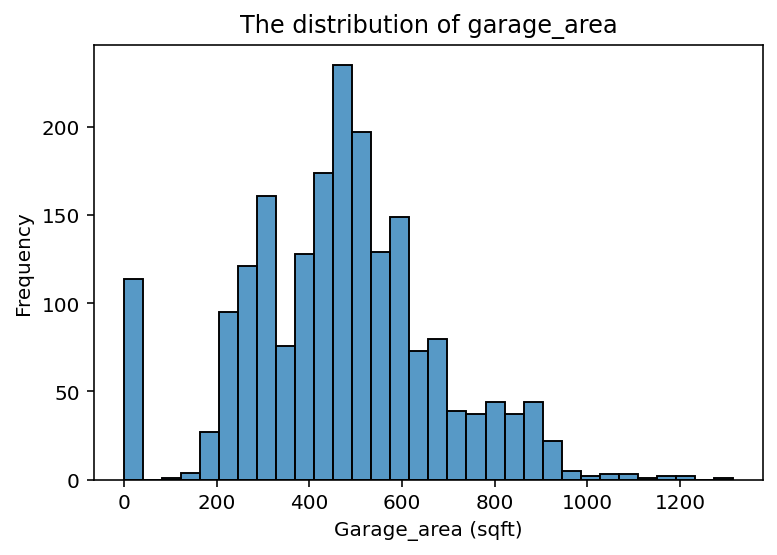

In [65]:
# Lot area distribution
sns.histplot(housing_data["garage_area"])
plt.xlabel('Garage_area (sqft)')
plt.ylabel('Frequency')
plt.title('The distribution of garage_area');

**Analysis: The distribution of above total basement area is approximately symmetrical with slightly positively skewed**

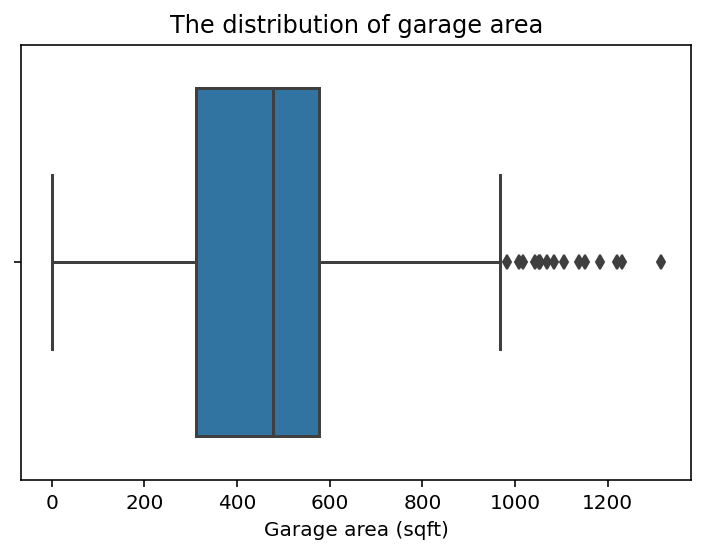

In [66]:
# The distribution of total basement area
sns.boxplot(data = housing_data, x = "garage_area")
plt.xlabel('Garage area (sqft)')
plt.title('The distribution of garage area');

**Analysis: The distribution of total basement area is approximately symmetrical with the presence of some outliers**

In [67]:
# To identify outliers

percentile_25 = np.percentile(housing_data["garage_area"], 25)
percentile_75 = np.percentile(housing_data["garage_area"], 75)
interquartile_range = percentile_75 - percentile_25
data_range_low_outer = percentile_25 - (3*interquartile_range)
data_range_high_outer = percentile_75 + (3*interquartile_range)

print(f"The outer_low_range is {0 if data_range_low_outer < 0 else data_range_low_outer}")
print(f"The outer_high_range is {data_range_high_outer}")

The outer_low_range is 0
The outer_high_range is 1368.0


In [68]:
housing_data.loc[(housing_data["garage_area"]>1368), :]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,utilities,lot_config,land_slope,...,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,log_saleprice,age,street_Pave,bsmt_qual_total


**Analysis: There are no extreme outlier that falls beyond the outer fence limit.**

### 3.2.6.2 Analysis of the correlation with log saleprice

In [69]:
# List of garage features
garage_data = housing_data[["garage_finish", "garage_cars", "garage_qual", "garage_area", "garage_cond","log_saleprice"]]

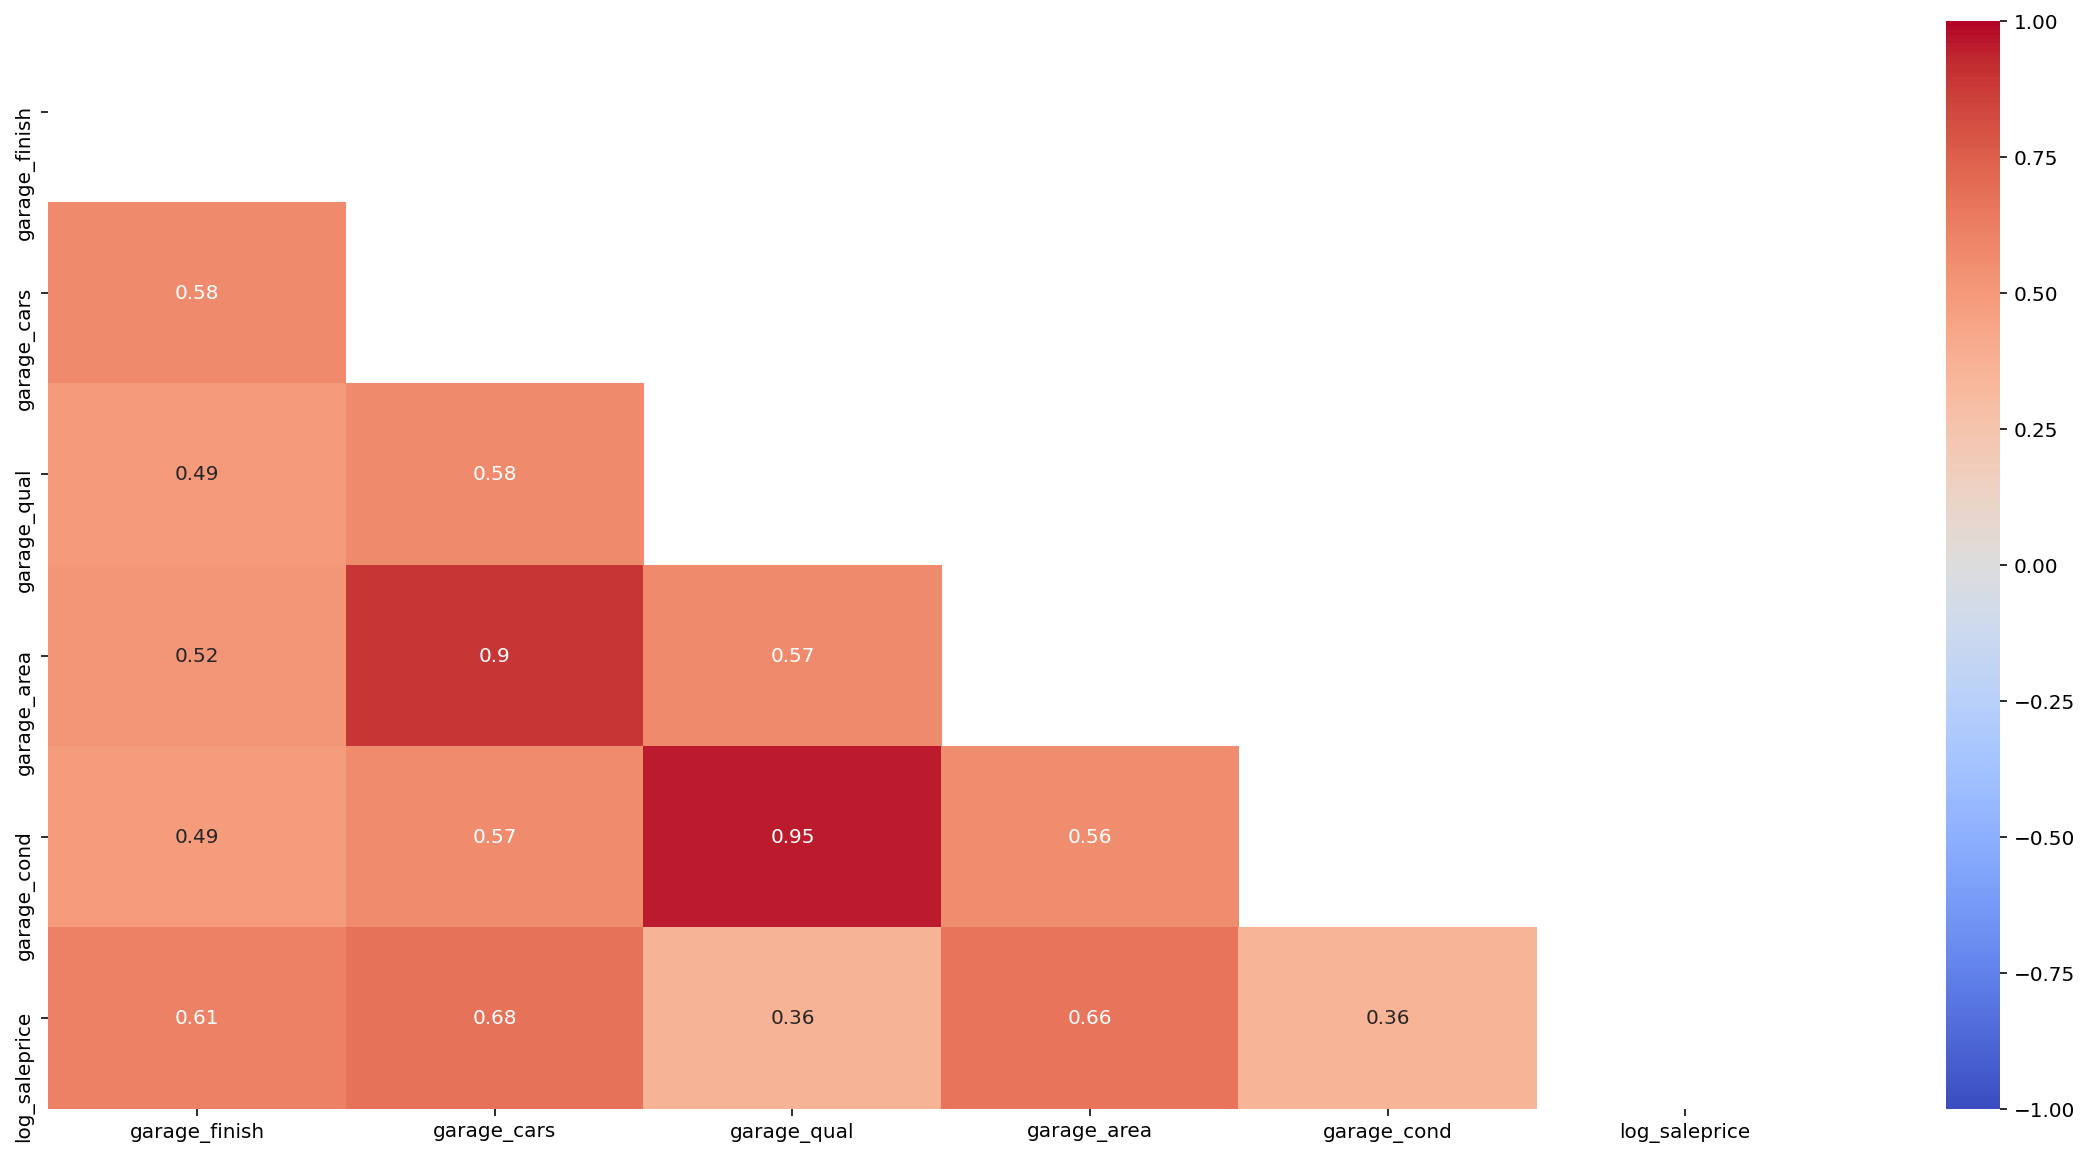

In [70]:
# Heatmap of garage features and the correlation with log_saleprice
plt.figure(figsize = [20,10])
sns.heatmap(garage_data.corr(), annot = True, mask = np.triu(garage_data.corr()), vmin = -1, vmax =1, cmap = 'coolwarm');

**Analysis: Garage features of garage_finish, garage_cars and garage_area has a strong correlation with log saleprice.**

garage_area and garage_cars has a strong correlation with log saleprice and with each other. While garage_finish has a strong correlation with log_saleprice. Thus, we will be using these features to feature the interaction term to observe if there is any improvement.

In [71]:
# Interaction between area and finish
housing_data["garage_area_finish"] = housing_data['garage_area']* housing_data['garage_finish']

In [72]:
# Interaction between cars and finish
housing_data["garage_cars_finish"] = housing_data['garage_cars']* housing_data['garage_finish']

In [73]:
# List comprising the new interaction term
garage_data_new = housing_data[["garage_finish", "garage_cars", "garage_qual", "garage_area", "garage_cond", "garage_area_finish", "garage_cars_finish","log_saleprice"]]

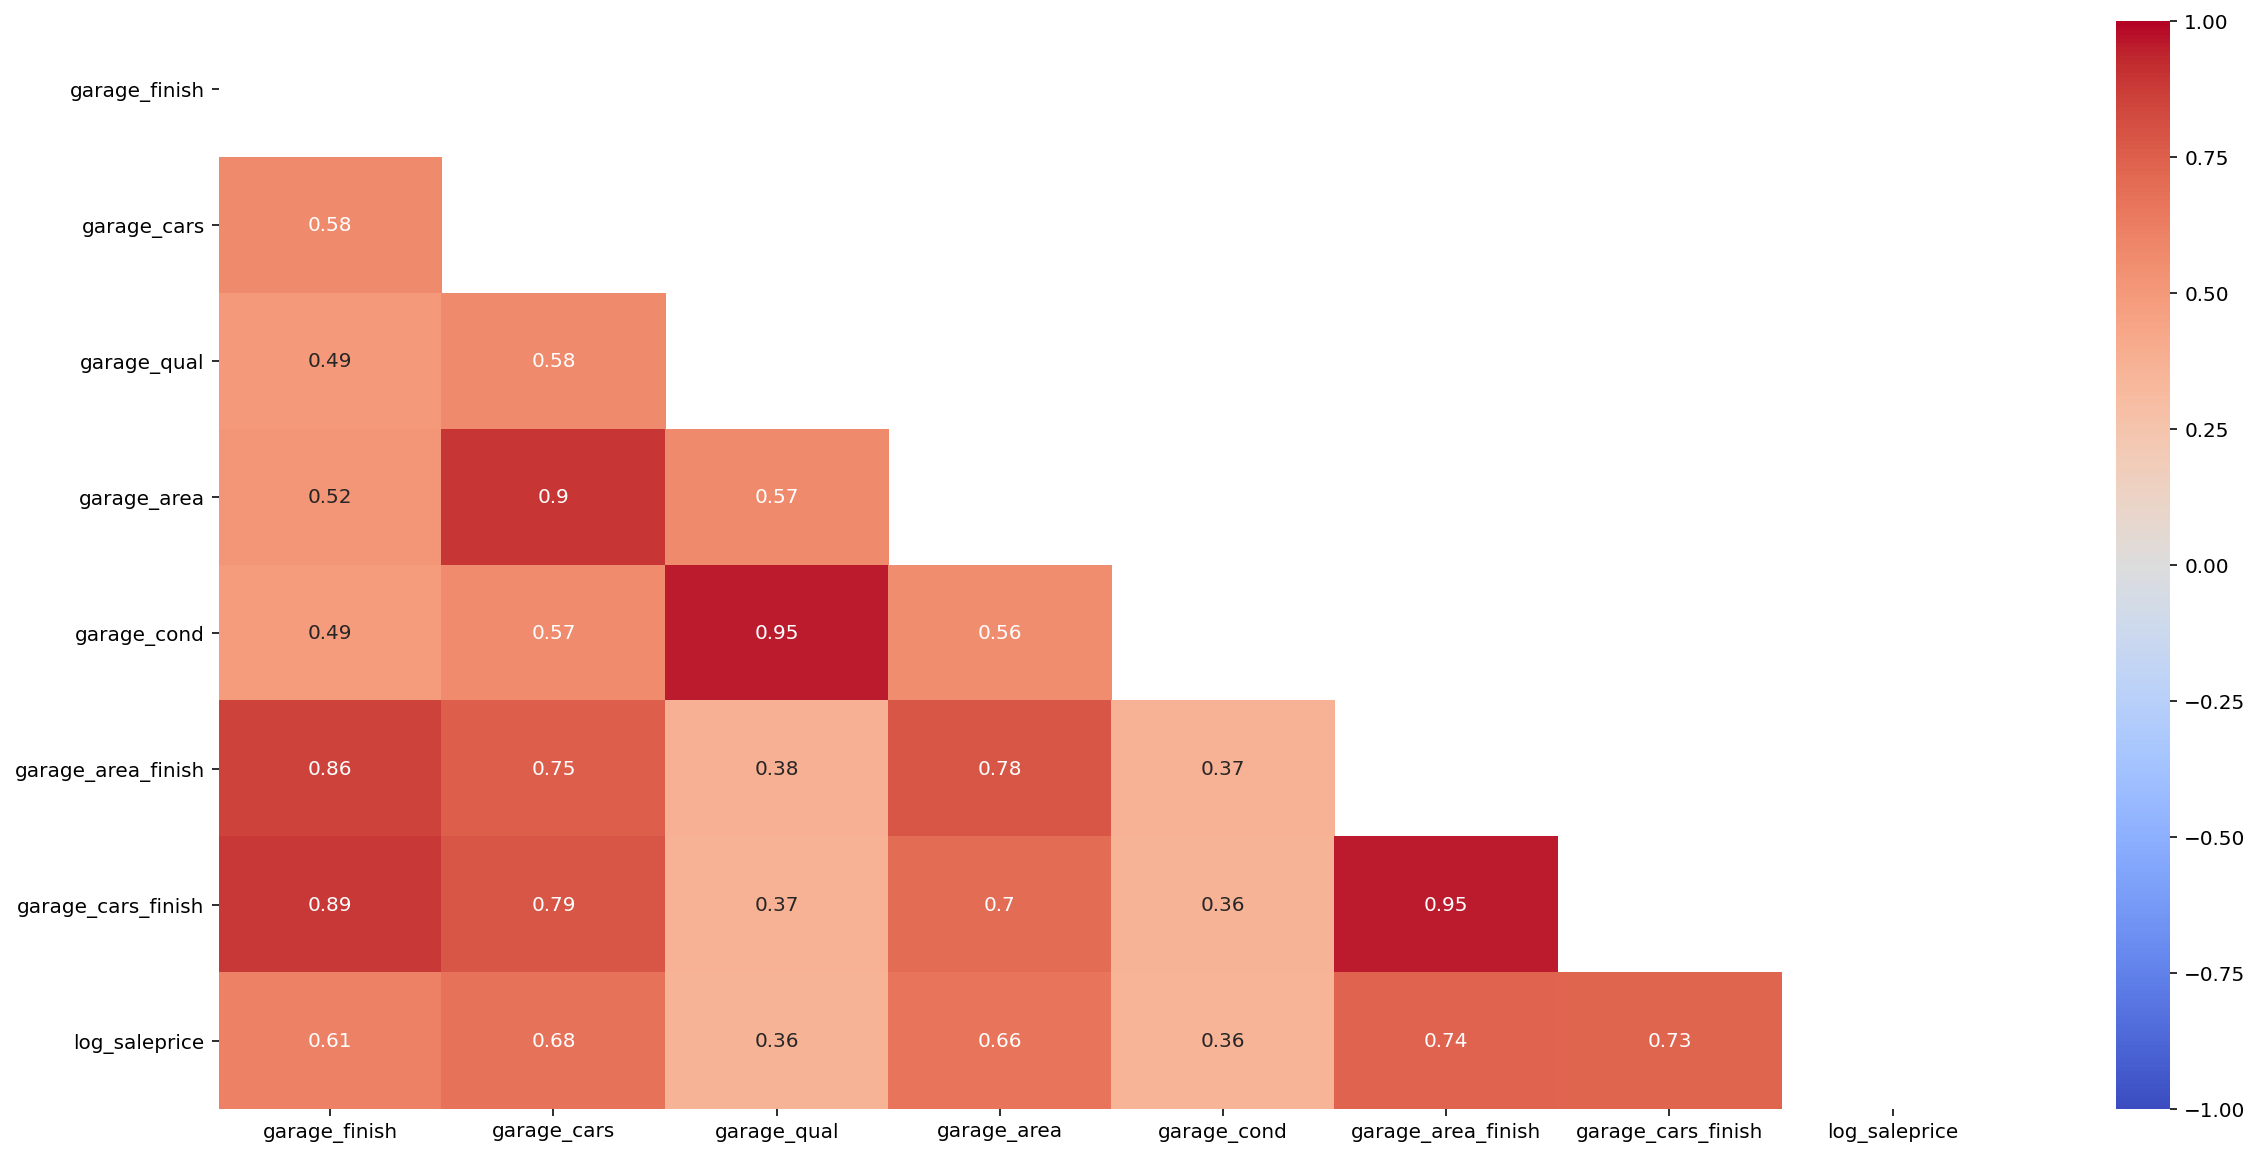

In [74]:
# Heatmap of garage features inclusive of the new interaction terms and the correlation with log_saleprice
plt.figure(figsize = [20,10])
sns.heatmap(garage_data_new.corr(), annot = True, mask = np.triu(garage_data_new.corr()), vmin = -1, vmax =1, cmap = 'coolwarm');

**Analysis: Garage_area_finish has a strongest correlation with the log_saleprice, thus garage_area, garage_finish and garage_area_finish will be used for further analysis**

garage_area_finish and garage_cars_finish has stronger correlation than their individual features with the strongest correlation is garage_area_finish. Thus, the features of garage_area, garage_finish and garage_area_finish will be used for further analysis.

**Summary: garage_area_finish, garage_area, garage_finish will be included for further studies in modeling**

### 3.2.7 Electrical and Heating

The electrical and heating includes heating type, heating quality, central air, utilities, fireplace,fireplace quality and electrical.

Buyer Interest: Central Air, Heating, Fireplace, Utilities

In [75]:
# Unique character of central_air_conditioning
housing_data.central_air.unique()

array(['Y', 'N'], dtype=object)

Question: Is the saleprice different by central air?

The null hypothesis, $H_0:$ There is no difference in saleprice by central air conditioning.

The alternative hypothesis, $H_A:$ There is a difference in saleprice by central air conditioning.

$$
\begin{eqnarray*}
&H_0:& \mu_1 = \mu_2 \\
&H_A:& \mu_1 \neq \mu_2
\end{eqnarray*}
$$

We will conduct this test assuming $\alpha=0.05$.

In [76]:
ttest_ind(housing_data[housing_data['central_air'] == 'Y']['saleprice'],
          housing_data[housing_data['central_air'] == 'N']['saleprice'])

Ttest_indResult(statistic=13.5063197720014, pvalue=7.520386626006736e-40)

The $t$-statistic is -13.07 and the $p$-value is very small. As $p$-value is smaller than $\alpha$, we reject our null hypothesis and accept the alternative hypothesis. This means that we accept that the salesprice is different with central air conditioning and without central air conditioning.

In [77]:
# Dummify encode the central air as there is a potential correlation with log saleprice
housing_data = pd.get_dummies(columns = ['central_air'], drop_first = True, data = housing_data)

As heating quality can be of reflective of heating type, therefore we will be using heating quality and other electrical features to observe the correlation with log_saleprice.

In [78]:
# List of electrical features
elec_data = housing_data[["heating_qc","electrical", "fireplaces", "fireplace_qu", "utilities", "central_air_Y","log_saleprice"]]

<AxesSubplot:>

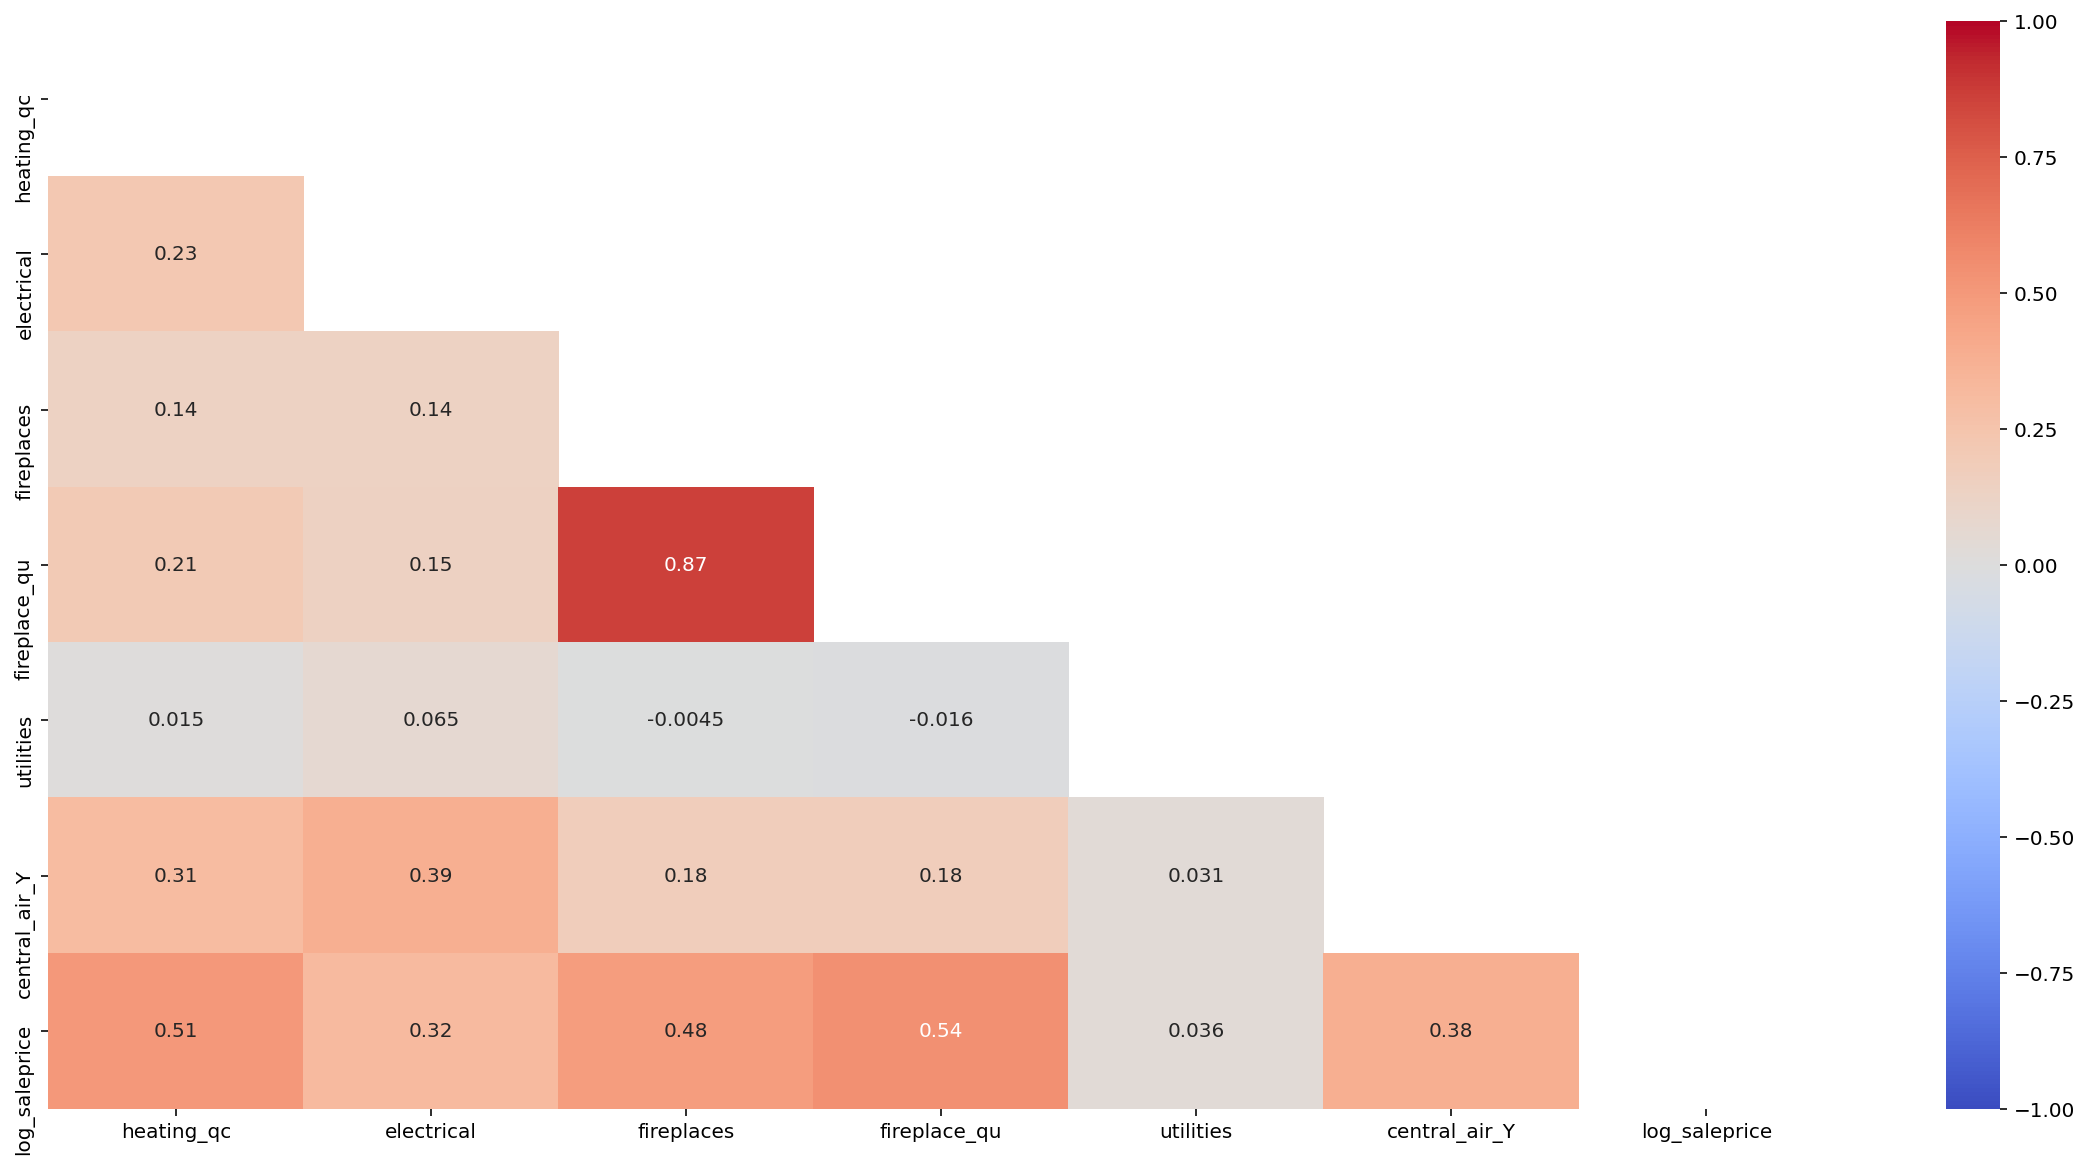

In [79]:
# Heatmap of electrical features and the correlation with log_saleprice
plt.figure(figsize = [20,10])
sns.heatmap(elec_data.corr(), annot = True, mask = np.triu(elec_data.corr()), vmin = -1, vmax =1, cmap = 'coolwarm')

**Analysis: Electrical features of heating_qc and fireplace_qu has a strong correlation with log saleprice.**

heating_qc and fireplace_qu has a strong correlation with log saleprice. While garage_finish has a strong correlation with log_saleprice. Thus, we will be using these features to feature the interaction term to observe if there is any improvement.

In [80]:
# Interaction between fireplace_qu and heating_qc
housing_data["fire_heat_qc"] = housing_data['fireplace_qu']* housing_data['heating_qc']

In [81]:
# List of electrical features
elec_data_new = housing_data[["heating_qc","electrical", "fireplaces", "fireplace_qu", "utilities", "central_air_Y", "fire_heat_qc","log_saleprice"]]

<AxesSubplot:>

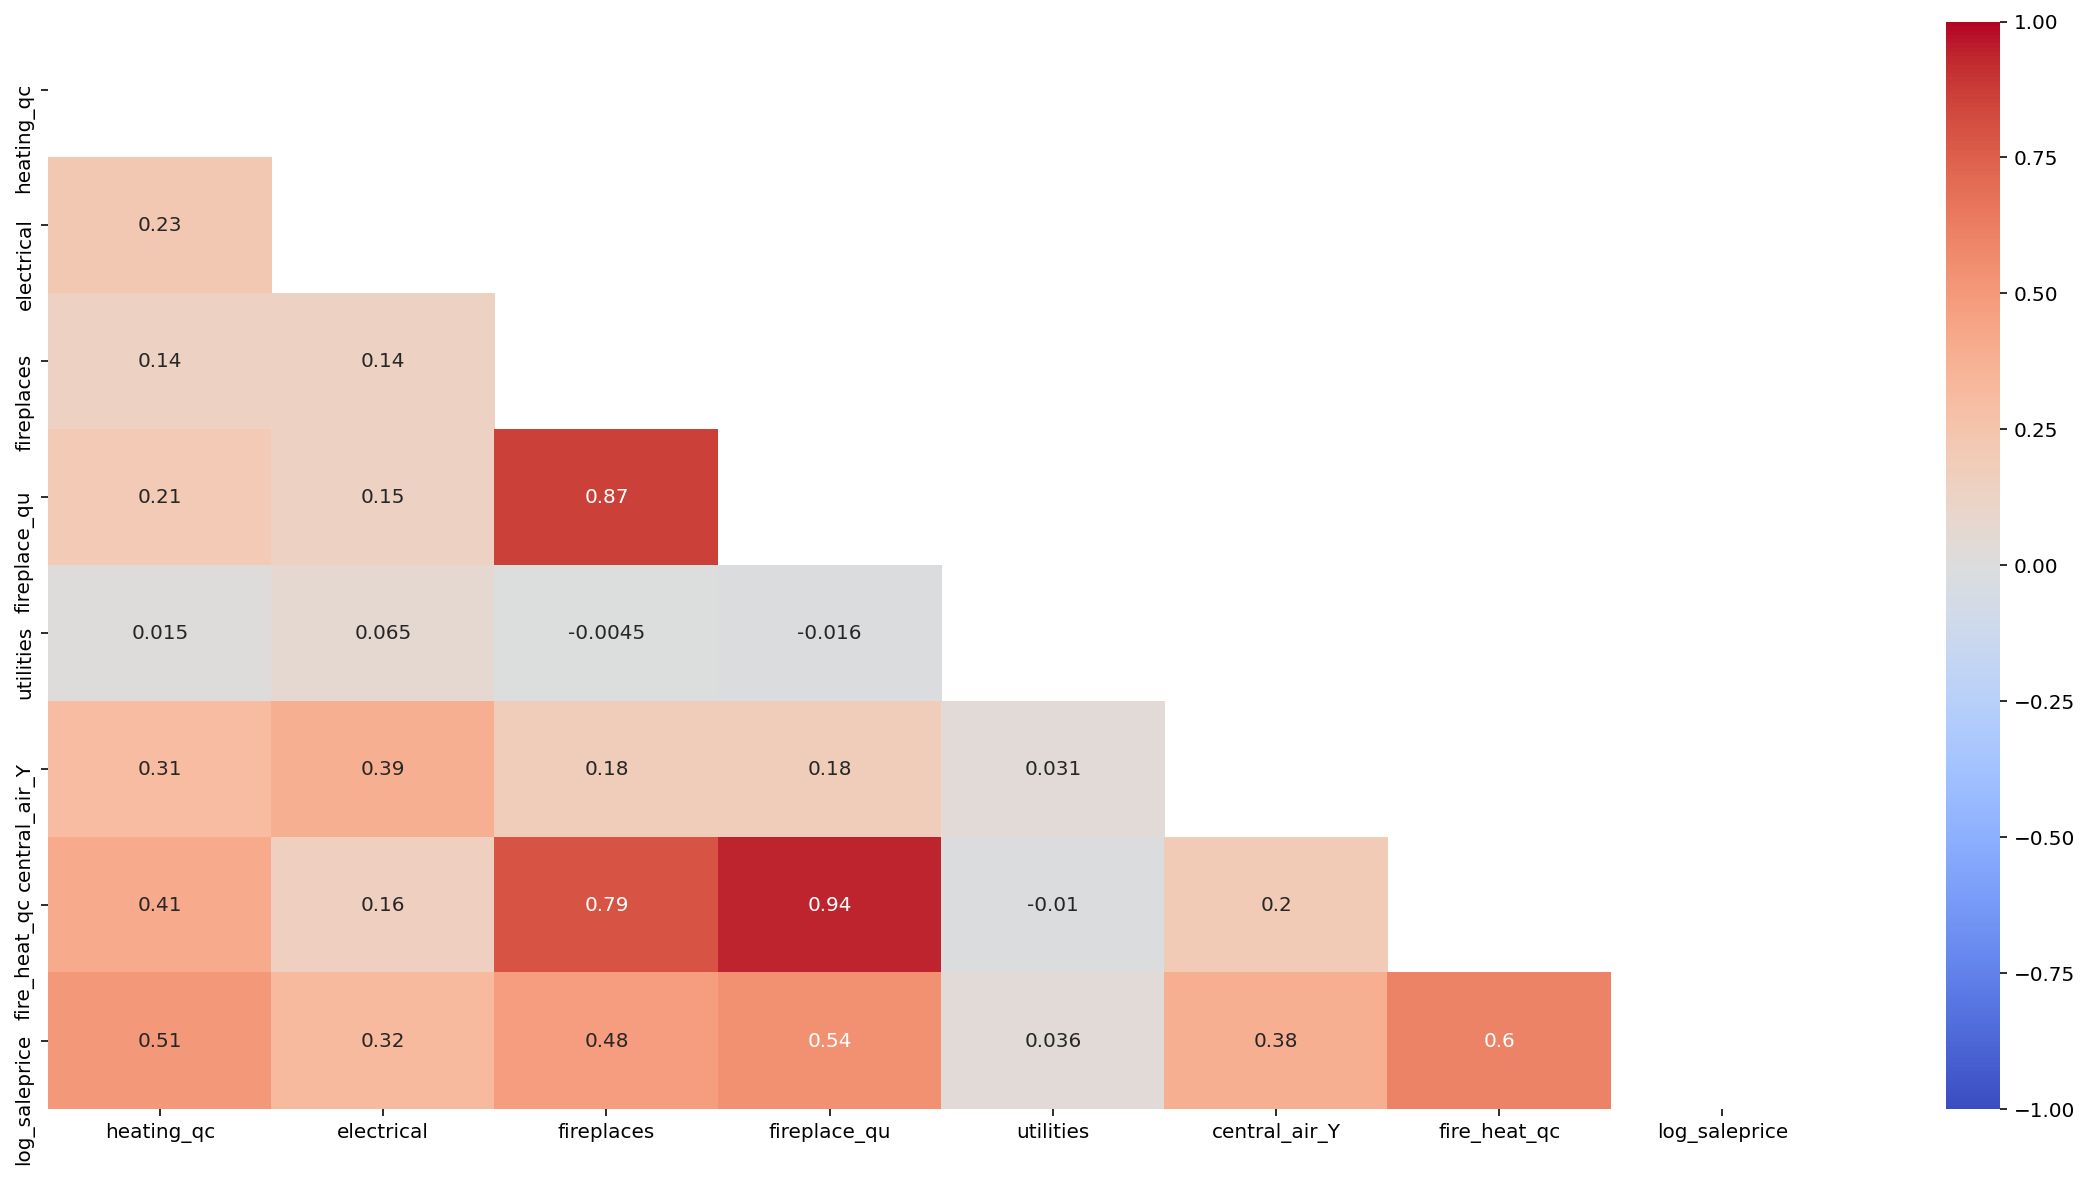

In [82]:
# Heatmap of electrical features and the correlation with log_saleprice
plt.figure(figsize = [20,10])
sns.heatmap(elec_data_new.corr(), annot = True, mask = np.triu(elec_data_new.corr()), vmin = -1, vmax =1, cmap = 'coolwarm')

**Analysis: fire_heat_qc has a strongest correlation with the log_saleprice, thus fireplace_qc, heating_qc and fire_heat_qc will be used for further analysis**

fire_heat_qc correlation has a stronger correlation to log_saleprice compared to the individual features. Thus, the features of fireplace_qc, heating_qc and fire_heat_qc will be used for further analysis.

**Summary: fire_heat_qc, heating_qc, fireplace_qc will be included for further studies in modeling**

### 3.2.8 External Facilities

The external facilities include paved drive, wood deck (sqft), open porch (sqft), enclosed porch (sqft), three-ssn porch (sqft), screen porch (sqft), pool area (sqft), pool quality and fence quality.

Buyer Interest: Fencing, Pool

In [83]:
# List of external facilities features
exter_fac_data = housing_data[["paved_drive","wood_deck_sf", "open_porch_sf", "enclosed_porch", "threessn_porch", "screen_porch","pool_area","pool_qc","fence","log_saleprice"]]

<AxesSubplot:>

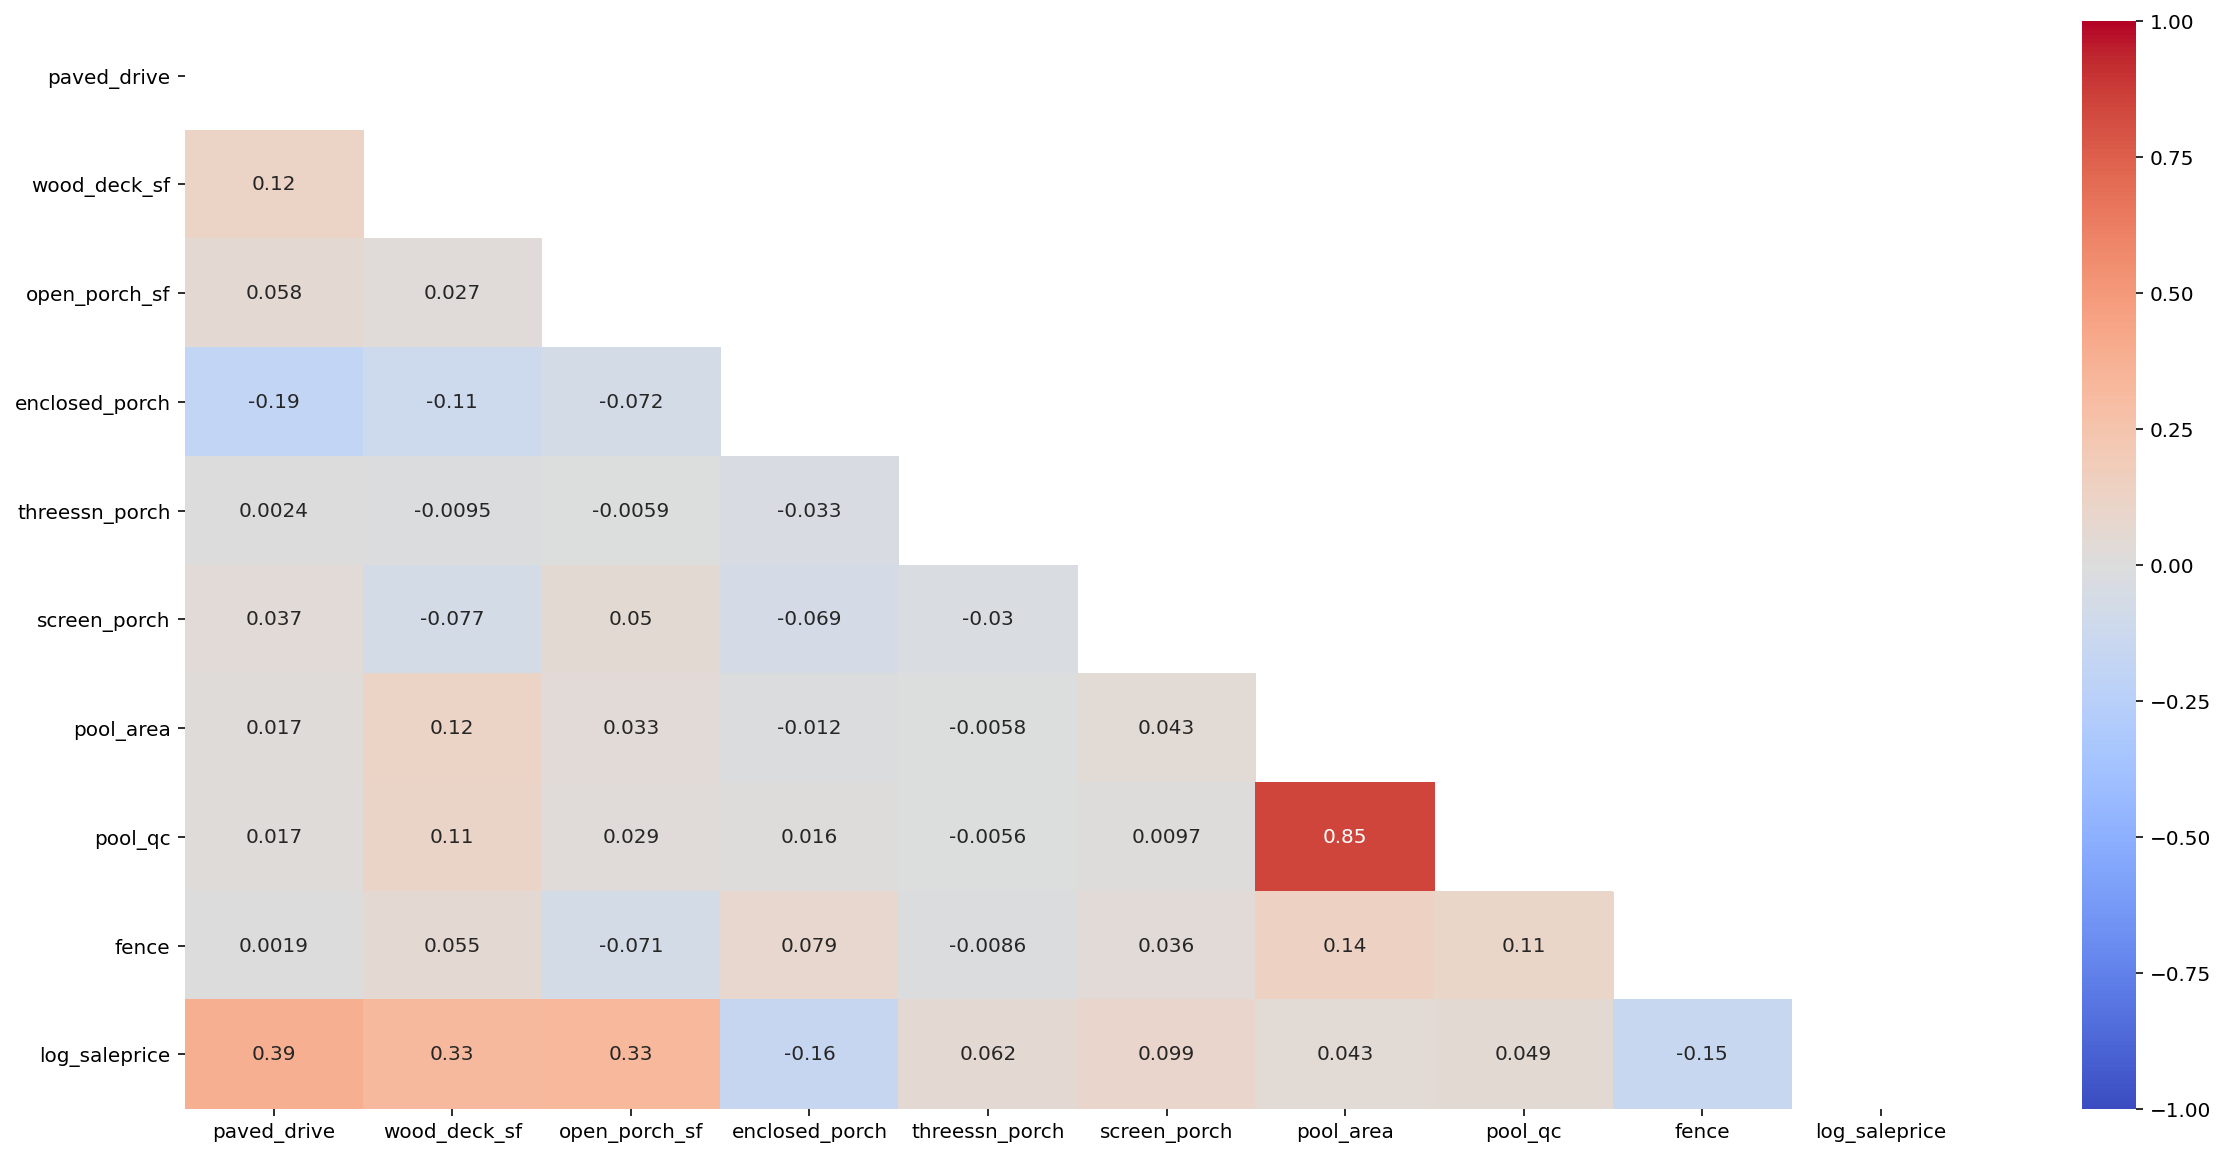

In [84]:
# Heatmap of electrical features and the correlation with log_saleprice
plt.figure(figsize = [20,10])
sns.heatmap(exter_fac_data.corr(), annot = True, mask = np.triu(exter_fac_data.corr()), vmin = -1, vmax =1, cmap = 'coolwarm')

**Analysis: There are no strong correlation of these features with log_saleprice**

The external facilities does not have any strong correlation with the log_saleprice. Thus, these features will not be used for further analysis.

**Summary: No features from the external facilities will be used for further studies in modeling**

### 3.2.9 Overall

### 3.2.9.1 Potential features

With the analysis above, the features of interest that have strong correlation with the log_saleprice.

Analysis features are:-
* Physical House Properties - Overall quality, age
* House Material - external quality
* Rooms - above grade living area, kitchen quality, full bath
* Basement - total_bsmt_sf, bsmt_qual, bsmt_qual_total
* Garage - garage_area, garage_finish, garage_area_finish
* Electrical - heating_qc, fireplace_qc, fire_heat_qc

Buyers interest are as followed:-
1. Main Interest - Bedroom, Bath, Above Ground Living Area, Year Built, Lot Area, Location
2. Other Considerations - Ms zoning, Basement, Central Air, Heating, Fireplace, Garage Cars, Exterior Roofing, Exterior House (general), Fencing, Utilities, Pool, House Level/Style, Total rooms above ground.

**Analysis**

Most of the analysis result coincide with the buyers interest. There are a few features that does not correlate with log_saleprice but have a weak or no correlation. This include lot area (+0.37 correlation), Central Air (+0.38 correlation), number of fireplace (+0.48 correlation), bedroom (+0.17 correlation), Utilities (+0.036 correlation), Fence (-0.15 correlation) and pool (+0.043 correlation).

This could possibly due to the possibility of lacking of representative samples (eg fence, pool), the over representative of the sample with favouring a particular option (eg central air, utilities) and another better representative/parameter features (eg lot area with above grade living area, number of fireplace with fireplace quality, and bedroom with total rooms above grade).

With this analysis obtained, we will then group these features with a dummy encoding for ms_zoning which is of buyer's interest.

In [85]:
# List of the potential features
potential_features = housing_data[["ms_zoning","overall_qual", "exter_qual", "bsmt_qual", "total_bsmt_sf", "heating_qc", "gr_liv_area", "full_bath", "kitchen_qual", "fireplace_qu", "garage_finish", "garage_area","log_saleprice", "age", "bsmt_qual_total", "garage_area_finish", "fire_heat_qc"]]

In [86]:
# Dummy encode ms_zoning 
potential_features = pd.get_dummies(columns = ["ms_zoning"], drop_first = True, data = potential_features)
potential_features.head()

,overall_qual,exter_qual,bsmt_qual,total_bsmt_sf,heating_qc,gr_liv_area,full_bath,kitchen_qual,fireplace_qu,garage_finish,...,log_saleprice,age,bsmt_qual_total,garage_area_finish,fire_heat_qc,ms_zoning_FV,ms_zoning_I,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM
0,6,3,3,725,4,1479,2,3,0,2,...,11.779129,34,2175,950,0,0,0,0,1,0
1,7,3,4,913,4,2122,2,3,3,2,...,12.301383,14,3652,1118,12,0,0,0,1,0
2,5,2,3,1057,2,1057,1,3,0,1,...,11.599103,57,3171,246,0,0,0,0,1,0
3,5,2,4,384,3,1444,2,2,0,3,...,12.066811,4,1536,1200,0,0,0,0,1,0
4,6,2,2,676,2,1445,2,2,0,1,...,11.838626,110,1352,484,0,0,0,0,1,0


### 3.2.9.2 Heatmap of the potential features

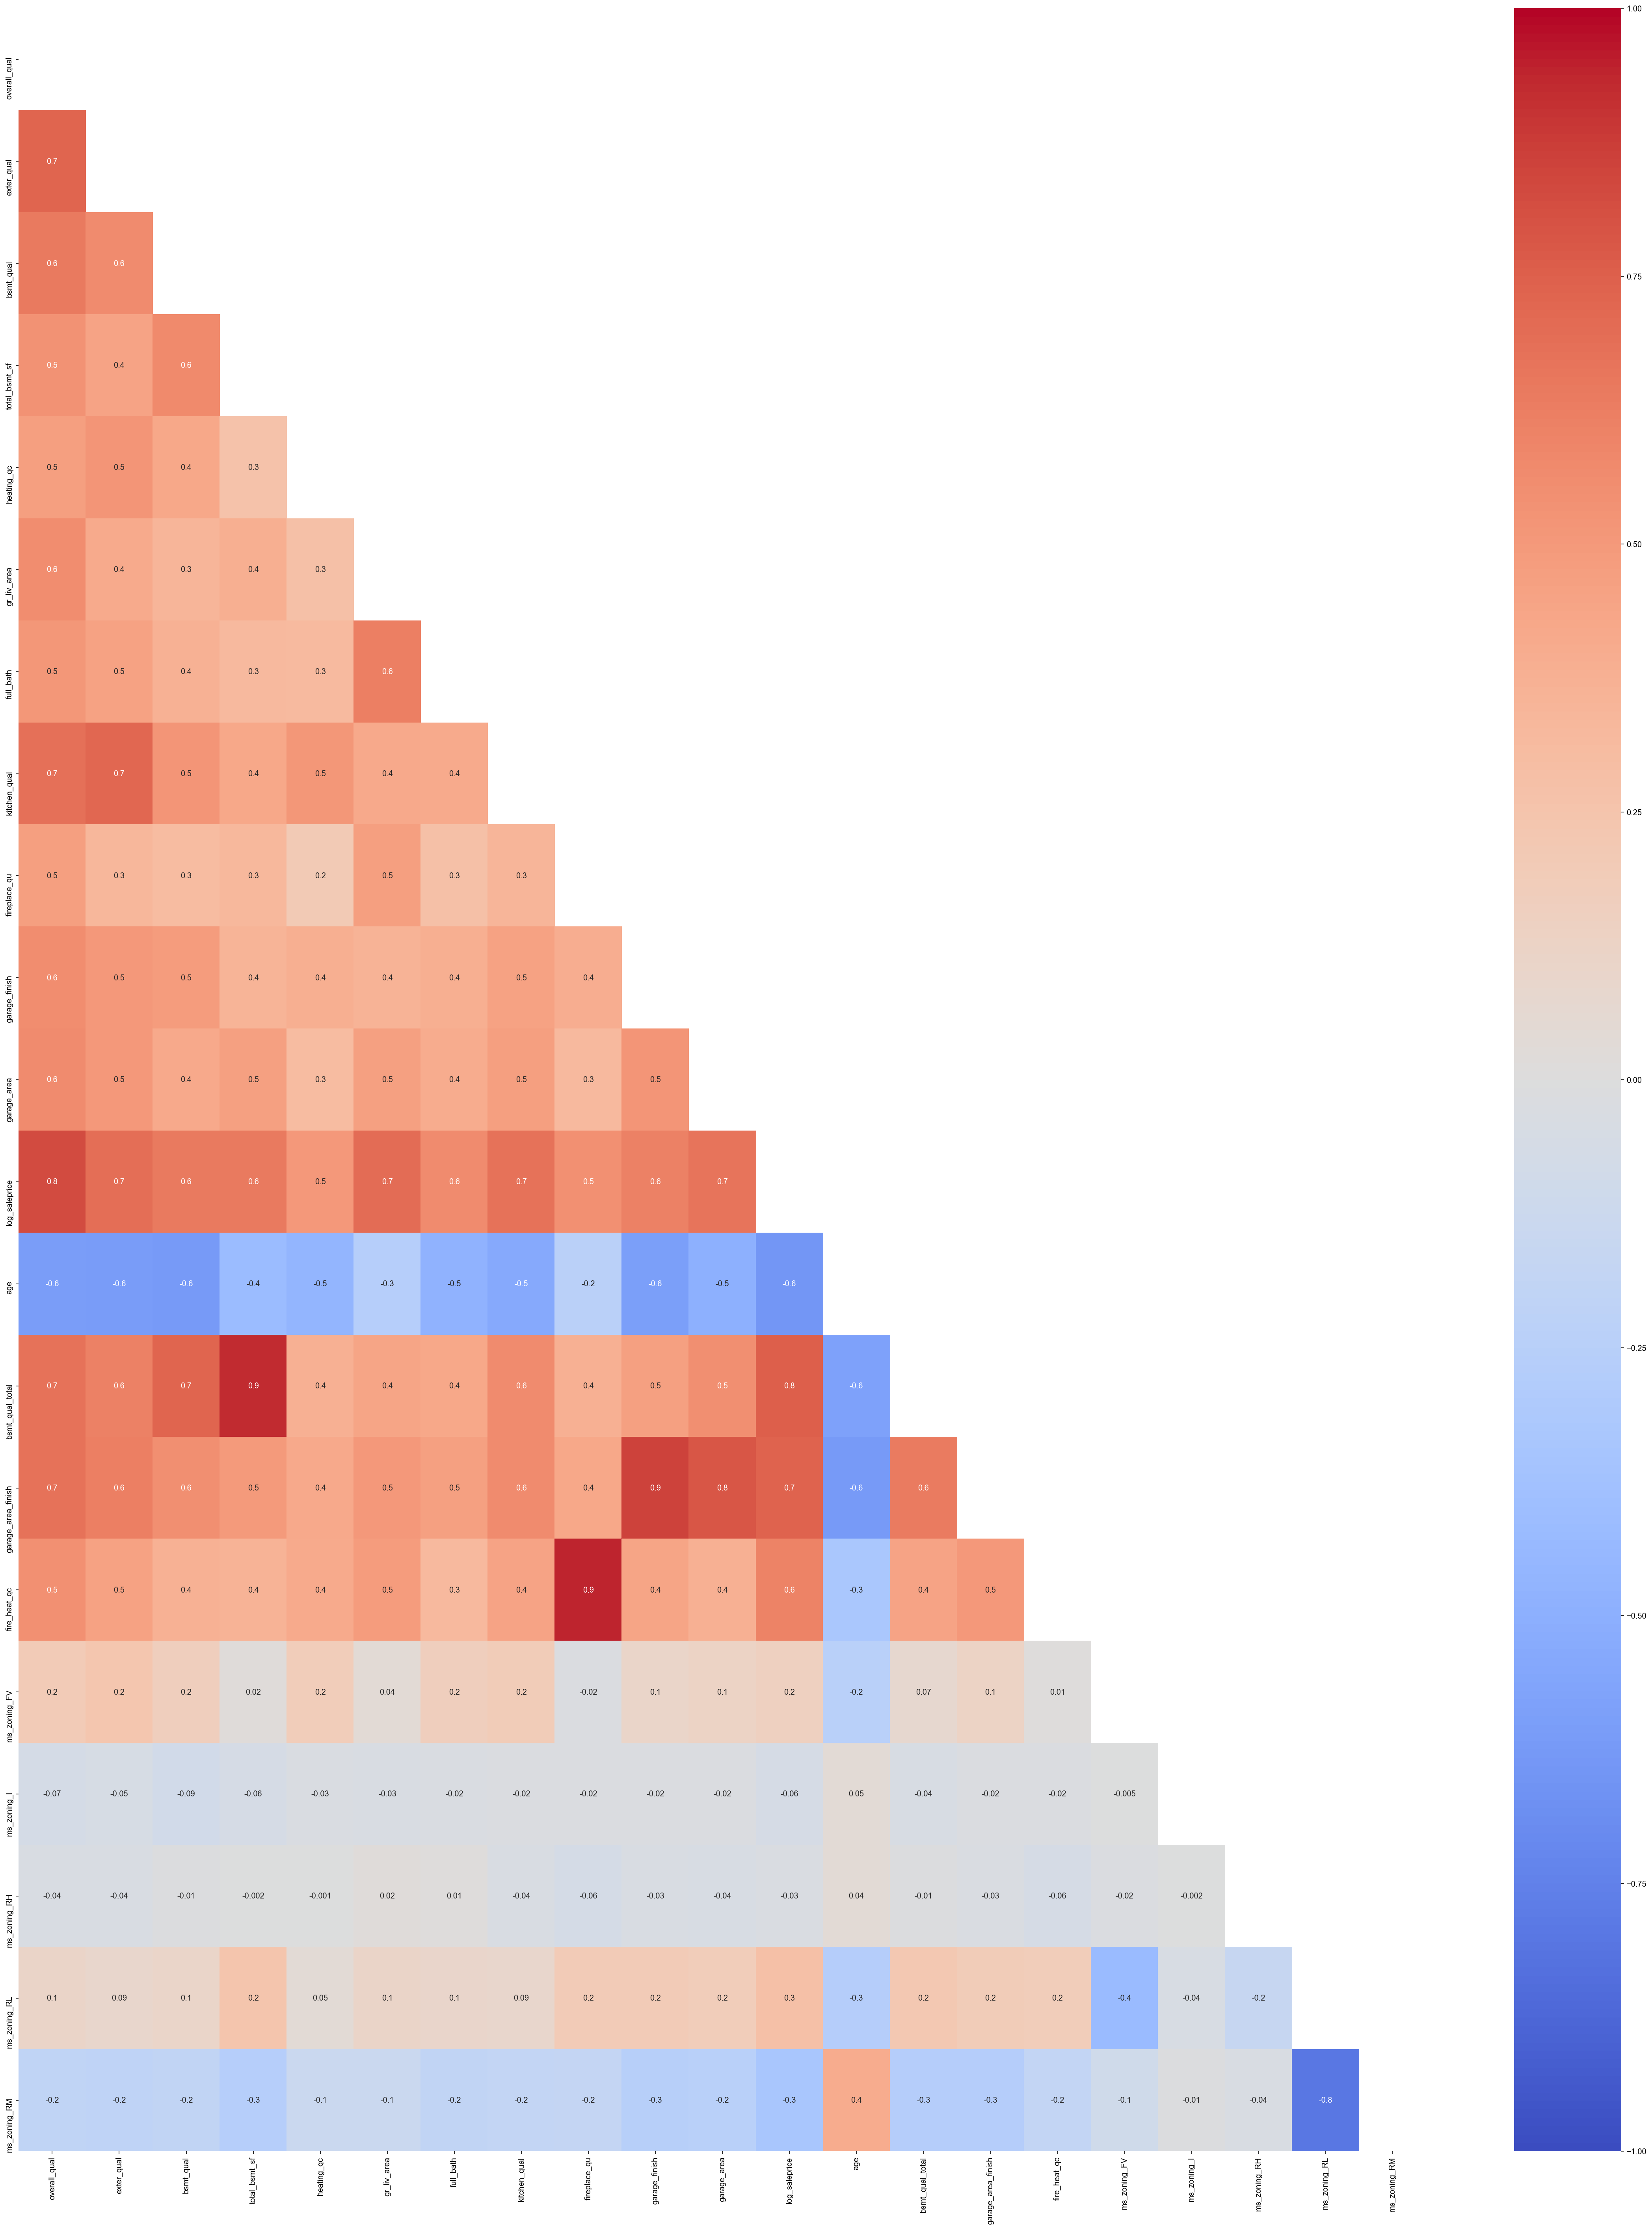

In [87]:
plt.figure(figsize = [40,50])
res = sns.heatmap(potential_features.corr(), annot = True, mask = np.triu(potential_features.corr()), vmin = -1, vmax =1, cmap = 'coolwarm', fmt='.1g')
sns.set(font_scale=2.0)

**Analysis: There are three observations found in the heatmap.**

* A strong negative correlation between ms_zoning RM (Residential Medium Density) and ms_zoning RL (Residential Low Density) which are variable in a categorical data.
* A strong positive correlation due to the interaction term.
* A moderately positive correlation between quality features (ordinal data).

### 3.2.10 Apply the changes made on to test_housing_data 

In [88]:
# To calculate the age from 2010
test_housing_data["age"] = test_housing_data["year_built"].map(lambda x: 2010 - x)
test_housing_data.head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,sale_type,alley_Grvl,alley_Pave,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,age
0,2658,190,RM,69,9142,Pave,3,Lvl,3,Inside,...,WD,1,0,0,0,0,0,0,1,100
1,2718,90,RL,69,9662,Pave,2,Lvl,3,Inside,...,WD,0,0,0,1,0,0,0,0,33
2,2414,60,RL,58,17104,Pave,2,Lvl,3,Inside,...,New,0,0,0,1,0,0,0,0,4
3,1989,30,RM,60,8520,Pave,3,Lvl,3,Inside,...,WD,0,0,0,0,0,0,0,1,87
4,625,20,RL,69,9500,Pave,2,Lvl,3,Inside,...,WD,0,0,0,1,0,0,0,0,47


In [89]:
# Dummify encode the central air as there is a potential correlation with log saleprice
test_housing_data = pd.get_dummies(columns = ['street'], drop_first = True, data = test_housing_data)

In [90]:
# Interaction between basement quality and total basement area
test_housing_data["bsmt_qual_total"] = test_housing_data['bsmt_qual']* test_housing_data['total_bsmt_sf']

In [91]:
# Interaction between area and finish
test_housing_data["garage_area_finish"] = test_housing_data['garage_area']* test_housing_data['garage_finish']

In [92]:
# Dummify encode the central air as there is a potential correlation with log saleprice
test_housing_data = pd.get_dummies(columns = ['central_air'], drop_first = True, data = test_housing_data)

In [93]:
# Interaction between fireplace_qu and heating_qc
test_housing_data["fire_heat_qc"] = test_housing_data['fireplace_qu']* test_housing_data['heating_qc']

In [94]:
# List of the potential features
test_potential_features = test_housing_data[["ms_zoning","overall_qual", "exter_qual", "bsmt_qual", "total_bsmt_sf", "heating_qc", "gr_liv_area", "full_bath", "kitchen_qual", "fireplace_qu", "garage_finish", "garage_area", "age", "bsmt_qual_total", "garage_area_finish", "fire_heat_qc"]]

In [95]:
test_potential_features = pd.get_dummies(columns = ["ms_zoning"], drop_first = True, data = test_potential_features)
test_potential_features.head()

,overall_qual,exter_qual,bsmt_qual,total_bsmt_sf,heating_qc,gr_liv_area,full_bath,kitchen_qual,fireplace_qu,garage_finish,garage_area,age,bsmt_qual_total,garage_area_finish,fire_heat_qc,ms_zoning_FV,ms_zoning_I,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM
0,6,2,2,1020,3,1928,2,1,0,1,440,100,2040,440,0,0,0,0,0,1
1,5,2,4,1967,2,1967,2,2,0,3,580,33,7868,1740,0,0,0,0,1,0
2,7,3,4,654,4,1496,2,3,4,2,426,4,2616,852,16,0,0,0,1,0
3,5,3,3,968,2,968,1,2,0,1,480,87,2904,480,0,0,0,0,0,1
4,6,2,4,1394,3,1394,1,2,4,2,514,47,5576,1028,12,0,0,0,1,0


In [96]:
test_potential_features.head()

,overall_qual,exter_qual,bsmt_qual,total_bsmt_sf,heating_qc,gr_liv_area,full_bath,kitchen_qual,fireplace_qu,garage_finish,garage_area,age,bsmt_qual_total,garage_area_finish,fire_heat_qc,ms_zoning_FV,ms_zoning_I,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM
0,6,2,2,1020,3,1928,2,1,0,1,440,100,2040,440,0,0,0,0,0,1
1,5,2,4,1967,2,1967,2,2,0,3,580,33,7868,1740,0,0,0,0,1,0
2,7,3,4,654,4,1496,2,3,4,2,426,4,2616,852,16,0,0,0,1,0
3,5,3,3,968,2,968,1,2,0,1,480,87,2904,480,0,0,0,0,0,1
4,6,2,4,1394,3,1394,1,2,4,2,514,47,5576,1028,12,0,0,0,1,0


#### Exporting Data

In [97]:
#potential_features.to_csv("potential_features_id.csv", index = False) 

In [98]:
#test_potential_features.to_csv("test_potential_features_id.csv", index = False) 

### References

[1] "Ames, IA New Listings for Sale", *Movoto* 2021. [Online]. Available: https://www.movoto.com/ames-ia/new-7/. [Accessed: Apr. 6. 2021].

[2]"Homes in Ames, IA", *Kelller Williams* 2021. [Online]. Available: https://desmoines.homefront.com/homesearch/ames-ia. [Accessed: Apr. 6. 2021].

[3]"Real Estate & Homes For Sale", *Zillow* 2021. [Online]. Available: https://www.zillow.com/homes/. [Accessed: Apr. 6. 2021].